#Imports and variables

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install latextable
!pip install names
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for latextable: filename=latextable-0.3.0-py3-none-any.whl size=7254 sha256=11fe2b8fcfeb90949778b575d1c7ca1cab2ce18b9f8b762a654b9e3587f21a06
  Stored in directory: /root/.cache/pip/wheels/a3/8d/a3/41e5c8fb7490c6e93ceb64ca1740f172b7ea837fe42ac41ce0
Successfully built latextable
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 789 kB 12.1 MB/s 
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803699 sha256=be7eaf51b2b22fcd1736d4ef4f8c5ca5d52bbc216033382fa69f799bb4033fd8
  Stored in directory: /root/.cache/pip/wheels/05/ea/68/92f6b0669e478af9b7c3c524520d03050089e034edcc775c2b
Successfully built names
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 101 kB 6.8 MB/s 


In [ ]:
import random
from random import randint, choice, sample

import latextable
from texttable import Texttable

from sympy import *

variables = 'a b c d m n p q r s t w x y'
variables = symbols(variables, real=True)
variables += (Symbol('z'),)
a,b,c,d,m,n,p,q,r,s,t,w,x,y,z = variables

# import sympy
# from sympy import latex,simplify,nsimplify,sympify,Symbol,symbols
# from sympy import Rational,Integer,Float,S,oo
# from sympy import log,Pow,powsimp,powdenest,sqrt,real_root,lcm
# from sympy import ImageSet,Interval,Lambda,Contains,Union,Piecewise,EmptySet

from scipy import stats
import numpy as np

#Classes

##Functions

###Linear

In [ ]:
class LinFunc():
    """
    Represent a linear function.

    Attributes
    ----------
        slope : number (int, float, or Rational)
        intercept : number
        variable : sympy symbol, default=x
        label : str, default='f'
        expr : sympy expression
        domain : sympy set, default=S.Reals
        precision : int, default=2
    """

    def __init__(self, slope, pt, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct linear function object from slope and y-intercept.

        Parameters
        ----------
            slope : number (int, float, or Rational)
            pt : number or list
            variable : sympy symbol, default=x
            label : str, default='f'
            domain : sympy set, default=S.Reals
            precision : int, default=2
        """
        
        self.slope, pt = sympify([slope, pt])
        
        self.intercept = pt[1] - pt[0]*self.slope if type(pt)==list else pt
        self.expr = self.slope*variable + self.intercept

        self.variable = variable
        self.label = label
        self.domain = domain
        self.precision = precision
    
    def __str__(self):
        """Return LaTeX formatted slope-intercept form."""
        
        if self.slope in [0,1]:
            slopeInt = ''
        elif self.slope == -1:
            slopeInt = '-'
        else:
            slopeInt = latexify(self.slope, self.precision)
        slopeInt += latex(self.variable) if self.slope!=0 else '' 
        
        intercept = latexify(self.intercept, self.precision)
        if self.intercept>0 and self.slope!=0:
            slopeInt += ' + '
        if self.intercept!=0 or self.slope==0:
            slopeInt += intercept
            
        return slopeInt
    
    @classmethod
    def fromPts(cls, pt1, pt2, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct linear function object from two ordered pairs.

        Parameters
        ----------
            pt1, pt2 : list or tuple
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        pt1, pt2 = sympify([pt1, pt2])
        
        slope = (pt2[1] - pt1[1])/(pt2[0] - pt1[0])
        
        if pt1[0]==0:
            return cls(slope, pt1[1], variable, label, domain, precision)
        elif pt2[0]==0:
            return cls(slope, pt2[1], variable, label, domain, precision)
        else:
            return cls(slope, pt1, variable, label, domain, precision)

    def subs(self, input):
        """Return evaluation of function at input."""

        return self.expr.subs(self.variable, sympify(input))

    def subSet(self, preimage):
        """Return image of set."""

        return ImageSet(Lambda(self.variable, self.expr), preimage).intersect(S.Reals)

    def getRange(self):
        """Return range of function."""

        return self.subSet(self.domain)
        
    def solve(self, output):
        if self.slope == 0:
            return self.domain if output==self.intercept else None
        else:
            return (sympify(output)-self.intercept)/self.slope

    def getSlopeInt(self, notation='func'):
        """Return LaTeX formatted slope-intercept form."""

        if notation == 'func':
            return f'{self.label}({self.variable}) = ' + str(self)
        else:
            return notation + '=' + str(self)

    def getPtSlope(self, pt=1, notation='func'):
        """
        Return LaTeX formatted point-slope form.
        
        Parameters
        ---------
            pt : number or list/tuple
                Independent variable value or ordered pair.
            notation : string, default='func'
                LHS of equality, default returns function notation.
        """

        pt = sympify(pt)
        if type(pt)!=list:
            pt = [pt] + [self.subs(pt)]
        
        ptTex = latexify(pt, self.precision)
        
        if self.slope in [0,1]:
            ptSlope = ''
        elif self.slope == -1:
            ptSlope = '-'
        else:
            ptSlope = latexify(self.slope, self.precision)
            
        if self.slope!=0:
            ptSlope += r'\left(' + latex(self.variable)
            ptSlope += '+' + ptTex[0][1:] if pt[0]<0 else '-' + ptTex[0]
            ptSlope += r'\right)'
        
        if pt[1]>0 and self.slope!=0:
            ptSlope += ' + '
        if pt[1]!=0 or self.slope==0:
            ptSlope += ptTex[1]
        
        if notation == 'func':
            return fr'{self.label}({self.variable}) = ' + ptSlope
        else:
            return notation + '=' + ptSlope
            
    def getStdForm(self, notation='y', mult=1):
        if self.slope == 0:
            mult = nsimplify(self.intercept).q
        elif self.intercept == 0:
            mult = nsimplify(self.slope).q
        else:
            mult *= abs(lcm(nsimplify(self.slope).q, nsimplify(self.intercept).q))
        mult = -mult if self.slope<=0 else mult
        
        stdForm = latex(nsimplify(mult*self.slope*self.variable - mult))
        stdForm = stdForm[:-1] if abs(mult)==1 else stdForm
        stdForm += notation + '=' + latex(nsimplify(-mult*self.intercept))
        
        return stdForm
        
    def getTable(self, nums, vals=True, vertical=True, labels=None):
        """
        Return LaTeX formatted table at given positions with or without blanks.
        
        Parameters
        ----------
            nums : list of ints
            vals : bool or list of bools or nonempty/empty strings ('')
            vertical : bool, default=True
            labels : list, default=None
                Defaults are independent variable and function notation.
        """
        
        vals = len(nums)*[vals] if type(vals)==bool else vals
        images = [signify(latexify(self.subs(jj), self.precision)) for jj in nums]
        images = [jj if vals[count] else r'\phantom{' + jj + r'}' for count,jj in enumerate(images)]
        
        nums = sympify(nums)
        nums = [signify(latexify(jj, self.precision)) for jj in nums]
        
        if labels == None:
            labels = [signify(str(self.variable)), fr'${self.label}({self.variable})$']
        if vertical:
            header = labels
            rows = list(zip(nums,images))
        else:
            header = [labels[0]] + list(nums)
            rows = [[labels[1]] + images]
        
        return tableGenerator(header, rows)

###Exponential

In [ ]:
class ExpFunc():
    """
    Represent an exponential function.

    Attributes
    ----------
        base : number (int, float, or Rational)
        intercept : number
        shift : number
        variable : sympy symbol, default=x
        label : str, default='f'
        expr : sympy expression
        domain : sympy set, default=S.Reals
        precision : int, default=2
    """

    def __init__(self, base, pt, shift=0, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct exponential function object from base, point/y-int, and vertical shift.

        Parameters
        ----------
            base : number (int, float, or Rational)
            intercept : number
            shift : number
            variable : sympy symbol, default=x
            label : str, default='f'
            domain : sympy set, default=S.Reals
            precision : int, default=2
        """

        self.base, pt, self.shift = sympify([base, pt, shift])

        self.lead = (pt[1]-self.shift)/Pow(self.base,pt[0]) if type(pt)==list else pt-self.shift
        self.expr = self.lead*(self.base**variable) + self.shift

        self.intercept = self.lead + self.shift
        
        self.variable = variable
        self.label = label
        self.domain = domain
        self.precision = precision
    
    def __str__(self):
        """Return LaTeX formatted standard form."""

        if self.lead == 1:
            string = ''
        elif self.lead == -1:
            string = '-'
        else:
            string = latexify(self.lead, self.precision)
            if type(self.base)==Integer and self.base>0:
                string += r' \cdot '
            
        if type(self.base)==Float or abs(self.base.q)>999:
            base = latexify(self.base, self.precision)
            string += fr'({base})^{self.variable}'
        else:            
            string += latex(self.base**self.variable)

        if self.shift != 0:
            string += ('+' + latexify(self.shift)) if self.shift>0 else latexify(self.shift)
            
        return string
    
    @classmethod
    def fromPts(cls, pt1, pt2, shift=0, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct exponential function object from two ordered pairs.

        Parameters
        ----------
            pt1, pt2 : list or tuple
            variable : sympy symbol, default=x
            label : str, default='f'
        """
        
        pt1, pt2, shift = sympify([pt1, pt2, shift])
        
        base = Pow((pt2[1]-shift)/(pt1[1]-shift), 1/(pt2[0]-pt1[0]))
        
        if pt1[0]==0:
            return cls(base, pt1[1], shift, variable, label, domain, precision)
        elif pt2[0]==0:
            return cls(base, pt2[1], shift, variable, label, domain, precision)
        else:
            return cls(base, pt1, shift, variable, label, domain, precision)

    def subs(self, input):
        """Return evaluation of function at input."""

        return self.expr.subs(self.variable, sympify(input))

    def subSet(self, preimage):
        """Return image of set."""

        return ImageSet(Lambda(self.variable, self.expr), preimage).intersect(S.Reals)

    def getRange(self):
        """Return range of function."""

        return self.subSet(self.domain)
        
    def solve(self, output):
        """Return preimage of given output."""
        
        soln = log((sympify(output)-self.shift)/self.lead, self.base)

        return soln if soln in S.Reals else None
    
    def getStdForm(self, notation='func'):
        """Return LaTeX formatted standard form."""

        if notation == 'func':
            return fr'{self.label}({self.variable}) = ' + str(self)
        else:
            return notation + '=' + str(self)
    
    def getBaseInt(self, notation='func'):
        """Return LaTeX formatted base-intercept form."""

        return self.getStdForm(notation)

    def getPtBase(self, pt=1, notation='func'):
        """
        Return LaTeX formatted point-base form.
        
        Parameter
        ---------
            pt : number or list/tuple
                Independent variable value or ordered pair.
            notation : string, default='func'
                LHS of equality, default returns function notation.
        """

        pt = sympify(pt)
        pt, lead = [pt, self.subs(pt)-self.shift] if type(pt) not in [list,tuple] else [pt[0], pt[1]-self.shift]
         
        if lead == 1:
            ptBase = ''
        elif lead == -1:
            ptBase = '-'
        else:
            ptBase = latexify(lead, self.precision)
            if type(self.base)==Integer and self.base>0:
                ptBase += r' \cdot '
            
        if type(self.base)==Float or abs(self.base.q)>999:
            base = latexify(self.base, self.precision)
            ptBase += fr'({base})^' + r'{' + latex(self.variable-pt) + r'}'
        else:
            ptBase += latex(self.base**(self.variable - pt))
        
        if self.shift != 0:
            ptBase += ('+' + latexify(self.shift)) if self.shift>0 else latexify(self.shift)
            
        if notation == 'func':
            return fr'{self.label}({self.variable}) = ' + ptBase
        else:
            return notation + '=' + ptBase
        
    def getTable(self, nums, vals=True, vertical=True, labels=None):
        """
        Return LaTeX formatted table at given positions with or without blanks.
        
        Parameters
        ----------
            nums : list of ints
            vals : bool or list of bools or nonempty/empty strings ('')
            vertical : bool, default=True
            labels : list, default=None
                Defaults are independent variable and function notation.
        """
        
        vals = len(nums)*[vals] if type(vals)==bool else vals
        images = [signify(latexify(self.subs(jj), self.precision)) for jj in nums]
        images = [jj if vals[count] else r'\phantom{' + jj + r'}' for count,jj in enumerate(images)]
        
        nums = sympify(nums)
        nums = [signify(latexify(jj, self.precision)) for jj in nums]
        
        if labels == None:
            labels = [signify(str(self.variable)), fr'${self.label}({self.variable})$']
        if vertical:
            header = labels
            rows = list(zip(nums,images))
        else:
            header = [labels[0]] + list(nums)
            rows = [[labels[1]] + images]
        
        return tableGenerator(header, rows)

In [ ]:
# func = LinFunc(3,1)
# print(func.slope)
# print(func.intercept)
# print(func.getSlopeInt())
# print(func.getPtSlope(5))
# print(func.getTable([1,2,3,4,5],vals=False))

# func = LinFunc(3, [4,7])
# print(func.getPtSlope(4))

# func = ExpFunc(2, [3,4])
# print(func.base)
# print(func.intercept)
# print(func.getBaseInt())
# print(func.getPtBase(3))

# func = ExpFunc(2, [3,4], shift=-5)
# print(func.base)
# print(func.intercept)
# print(func.lead)
# print(func.getStdForm())
# print(func.getPtBase(3))

# print(func.solve(-8))

###Quadratic

In [ ]:
class QuadFunc():
    """
    Represent a quadratic function.

    Attributes
    ----------
        aa : number (int, float, or Rational)
        bb : number
        cc : number
        
        variable : sympy symbol, default=x
        label : str, default='f'
        expr : sympy expression
        domain : sympy set, default=S.Reals
        precision : int, default=2
    """

    def __init__(self, aa, bb, cc, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from coefficients.

        Parameters
        ----------
            aa : number (int, float, or Rational)
            bb : number
            cc : number
            variable : sympy symbol, default=x
            label : str, default='f'
            domain : sympy set, default=S.Reals
            precision : int, default=2
        """
        
        self.aa, self.bb, self.cc = sympify([aa, bb, cc])
        
        self.expr = self.aa*variable**2 + self.bb*variable + self.cc

        self.variable = variable
        self.label = label
        self.domain = domain
        self.precision = precision
    
    def __str__(self):
        """Return LaTeX formatted standard form."""
        
        if self.aa in [0,1]:
            stdForm = ''
        elif self.aa == -1:
            stdForm = '-'
        else:
            stdForm = latexify(self.aa, self.precision)
        stdForm += latex(self.variable**2) if self.aa!=0 else '' 
        
        bb = latexify(self.bb, self.precision)
        if self.bb>0 and self.aa!=0:
            stdForm += ' + '
        if self.bb == -1:
            stdForm += ' - '
        elif self.bb not in [0,1]:
            stdForm += bb
        stdForm += latex(self.variable) if self.bb!=0 else ''
            
        cc = latexify(self.cc, self.precision)
        if self.cc>0 and (self.aa!=0 or self.bb!=0):
            stdForm += ' + '
        if self.cc!=0 or (self.aa==0 and self.bb==0):
            stdForm += cc
            
        return stdForm
    
    @classmethod
    def fromVertex(cls, aa, vertex, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from stretch factor (a) and vertex.

        Parameters
        ----------
            aa : number
            vertex : list or tuple
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        aa, hh, kk = sympify([aa, *vertex])
        
        return cls(aa, -2*aa*hh, a*hh**2+kk, variable, label, domain, precision)
    
    @classmethod
    def fromRoots(cls, aa, root1, root2, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from stretch factor (a) and roots.

        Parameters
        ----------
            aa : number
            root1, root2 : numbers
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        aa, root1, root2 = sympify([aa, root1, root2])
        
        return cls(aa, -aa*(root1+root2), a*root1*root2, variable, label, domain, precision)
    
    @classmethod
    def from2Pts(cls, aa, pt1, pt2, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from stretch factor (a) and 2 points.

        Parameters
        ----------
            aa : number
            pt1, pt2 : lists or tuples
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        aa, pt1, pt2 = sympify([aa, pt1, pt2])

        expr = aa*x**2 + b*x + c
        coeffs = solve([expr.subs(x,pt1[0])-pt1[1], expr.subs(x,pt2[0])-pt2[1]])
        
        return cls(aa, coeffs[b], coeffs[c], variable, label, domain, precision)
    
    @classmethod
    def from3Pts(cls, pt1, pt2, pt3, variable=x, label='f', domain=S.Reals, precision=2):
        """
        Construct quadratic function object from 3 points.

        Parameters
        ----------
            pt1, pt2, pt3 : lists or tuples
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        pt1, pt2, pt3 = sympify([pt1, pt2, pt3])

        expr = a*x**2 + b*x + c
        coeffs = solve([expr.subs(x,pt1[0])-pt1[1], expr.subs(x,pt2[0])-pt2[1], expr.subs(x,pt3[0])-pt3[1]])
        
        return cls(coeffs[a], coeffs[b], coeffs[c], variable, label, domain, precision)

    def subs(self, input):
        """Return evaluation of function at input."""

        return self.expr.subs(self.variable, sympify(input))

    def subSet(self, preimage):
        """Return image of set."""

        return ImageSet(Lambda(self.variable, self.expr), preimage).intersect(S.Reals)

    def getRange(self):
        """Return range of function."""

        return self.subSet(self.domain)
        
    def solve(self, output):
        return solve(self.expr.subs(self.variable,z)-output)

    def getVertex(self):
        hh = -Rational(self.bb,2*self.aa)
        return [hh, self.subs(hh)]

    def getRoots(self):
        return self.solve(0)

    def getStdForm(self, notation='func'):
        """Return LaTeX formatted standard form."""

        if notation == 'func':
            return f'{self.label}({self.variable}) = ' + str(self)
        else:
            return notation + '=' + str(self)

    # def getPtSlope(self, pt=1, notation='func'):
        # """
        # Return LaTeX formatted point-slope form.
        
        # Parameter
        # ---------
            # pt : number or list/tuple
                # Independent variable value or ordered pair.
        # """

        # pt = sympify(pt)
        # if type(pt)!=list:
            # pt = [pt] + [self.subs(pt)]
        
        # ptTex = latexify(pt, self.precision)
        
        # if self.slope in [0,1]:
            # ptSlope = ''
        # elif self.slope == -1:
            # ptSlope = '-'
        # else:
            # ptSlope = latexify(self.slope, self.precision)
            
        # if self.slope!=0:
            # ptSlope += r'\left(' + latex(self.variable)
            # ptSlope += '+' + ptTex[0][1:] if pt[0]<0 else '-' + ptTex[0]
            # ptSlope += r'\right)'
        
        # if pt[1]>0 and self.slope!=0:
            # ptSlope += ' + '
        # if pt[1]!=0 or self.slope==0:
            # ptSlope += ptTex[1]
        
        # if notation == 'func':
            # return fr'{self.label}({self.variable}) = ' + ptSlope
        # else:
            # return notation + '=' + ptSlope
        
    def getTable(self, nums, vals=True, vertical=True, labels=None):
        """
        Return LaTeX formatted table at given positions with or without blanks.
        
        Parameters
        ----------
            nums : list of ints
            vals : bool or list of bools or nonempty/empty strings ('')
        """
        
        vals = len(nums)*[vals] if type(vals)==bool else vals
        images = [signify(latexify(self.subs(jj), self.precision)) for jj in nums]
        images = [jj if vals[count] else r'\phantom{' + jj + r'}' for count,jj in enumerate(images)]
        
        nums = sympify(nums)
        nums = [signify(latexify(jj, self.precision)) for jj in nums]
        
        if labels == None:
            labels = [signify(str(self.variable)), fr'${self.label}({self.variable})$']
        if vertical:
            header = labels
            rows = list(zip(nums,images))
        else:
            header = [labels[0]] + list(nums)
            rows = [[labels[1]] + images]
        
        return tableGenerator(header, rows)

###Piecewise

In [ ]:
class PWFunc():
    """
    Represent a piecewise function.

    Attributes
    ----------
        variable : sympy symbol, default=x
        label : str, default='f'
        expr : sympy expression
        domain : sympy set
    """

    def __init__(self, *pairs, variable=x, label='f'):
        """
        Construct piecewise function object from expr-interval pairs.

        Parameters
        ----------
            pairs : array of expr-interval pairs
            variable : sympy symbol, default=x
            label : str, default='f'
        """

        self.variable = variable
        self.label = label
        
        exprs, intervals = zip(*pairs)
        intervals = list(map(makeInterval, intervals))
        self.pairs = list(zip(exprs, intervals))
        
        pieces = [[row[0], Contains(variable, row[1])] for row in self.pairs]
        self.expr = Piecewise(*pieces)
        
        self.domain = Union(*intervals)
    
    def __str__(self):
        """Return LaTeX."""
        # TODO: relational instead of intervals

        return fr'{self.label}({self.variable}) = ' + latex(self.expr)

    def subs(self, input):
        """Return evaluation of function at input."""

        return nsimplify(self.expr.subs(self.variable, input))

    def subSet(self, preimage):
        """Return image of set."""
        
        image = S.EmptySet
        for expr, interval in self.pairs:
            image = Union(image, ImageSet(Lambda(self.variable,expr),interval.intersect(preimage)))

        return image.intersect(S.Reals)

    def getRange(self):
        """Return range of function."""

        image = S.EmptySet
        for expr, interval in self.pairs:
            image = Union(image, ImageSet(Lambda(self.variable,expr),interval))

        return image.intersect(S.Reals)
        
    def solve(self, output):
        """Return preimage of given output."""
        solns = []
        
        for expr, interval in self.pairs:
            strings = solve(expr-output, self.variable)
            for ans in strings:
                if ans in interval:
                    solns.append(ans)
        
        return list(set(solns))
    
    def getLatex(self):
        """Return LaTeX."""

        return str(self)

    def getFeats(self, feats='all'):           # TODO: INC/DEC
        feats = ['domain','range','intercepts','extrema','change'] if feats=='all' else feats

        features = dict()
        if 'domain' in feats:
            features['domain'] = self.domain
        if 'range' in feats:
            features['range'] = self.getRange()
        if 'intercepts' in feats:
            features['yint'] = self.subs(0) if 0 in self.domain else None
            features['xints'] = self.solve(0)
        if 'extrema' in feats:
            rangeset = self.getRange()
            features['mins'] = [self.solve(rangeset.inf), rangeset.inf]
            features['maxes'] = [self.solve(rangeset.sup), rangeset.sup]
        if 'change' in feats:
            features.update({'inc': EmptySet, 'dec': EmptySet, 'const': EmptySet})
            for expr, interval in self.pairs:
                deriv = diff(expr,self.variable).subs(self.variable,z)
                if deriv.is_constant():
                    if deriv > 0:
                        features['inc'] = Union(features['inc'], interval)
                    elif deriv < 0:
                        features['dec'] = Union(features['dec'], interval)
                    else:
                        features['const'] = Union(features['const'], interval)
                else:
                    inc = Intersection(solve(deriv>0,self.variable).as_set(), interval)
                    features['inc'] = Union(features['inc'], inc)
                    features['dec'] = Union(features['dec'], interval-inc.closure)

        return features

    def printFeats(self, feats='all'):
        feats = ['domain','range','intercepts','extrema','change'] if feats=='all' else feats
        
        features, string = self.getFeats(feats), ''
        if 'domain' in feats:
            string += 'Domain: ' + signify(latexify(features['domain'])) + r' \newline '
        if 'range' in feats:
            string += 'Range: ' + signify(latexify(features['range'])) + r' \newline '

        if 'intercepts' in feats:
            string += '$y$-intercept: '
            if features['yint']==None:
                string += r'None \newline '
            else:
                string += signify(f'(0, {latexify(features["yint"])})') + r' \newline '

            string += '$x$-intercept(s): '
            if len(features['xints']) == 0:
                string += r'None \newline '
            else:
                xints = [jj if type(jj) in [int,Integer] else float(jj) for jj in features['xints']]
                string += signify(', '.join([f'({latexify(jj)}, 0)' for jj in xints])) + r' \newline '

        if 'extrema' in feats:
            features['mins'][1] = features['mins'][1] if type(features['mins'][1]) in [int,Integer] else float(features['mins'][1])
            string += 'Minimum: '
            if len(features['mins'][0]) > 0:
                mins = [jj if type(jj) in [int,Integer] else float(jj) for jj in features['mins'][0]]
                string += signify(latexify(features['mins'][1])) + ', occurs at $x=' + ', '.join([latexify(jj) for jj in mins]) + r'$ \newline '
            else:
                string += 'None (approaches ' + signify(latexify(features['mins'][1])) + r') \newline '
                
            features['maxes'][1] = features['maxes'][1] if type(features['maxes'][1]) in [int,Integer] else float(features['maxes'][1])
            string += 'Maximum: '
            if len(features['maxes'][0]) > 0:
                maxes = [jj if type(jj) in [int,Integer] else float(jj) for jj in features['maxes'][0]]
                string += signify(latexify(features['maxes'][1])) + ', occurs at $x=' + ', '.join([latexify(jj) for jj in maxes]) + r'$ \newline '
            else:
                string += 'None (approaches ' + signify(latexify(features['maxes'][1])) + r') \newline '

        if 'change' in feats:
            string += 'Increasing: ' + (signify(latexify(features['inc'])) if features['inc']!=EmptySet else 'None') + r'\newline '
            string += 'Decreasing: ' + (signify(latexify(features['dec'])) if features['dec']!=EmptySet else 'None') + r'\newline '
            string += 'Constant: ' + (signify(latexify(features['const'])) if features['const']!=EmptySet else 'None') + r'\newline '
        
        return string

In [ ]:
# # Make piecewise function with expr-interval pairs input as lists
# func = PWFunc( [2*x+1,'[0,1]'], [x**2,'(1,3)'], [0.5**(x-4),'[3,5]'], [-x+10,'(6,10]'] )

# # Or store pairs in array, then unpack array with (*) operator to give as input to PWFunc object
# pairs = [ [2*x+1,'[0,1]'], [x**2,'(1,3)'], [0.5**(x-4),'[3,5]'], [-x+10,'(6,10]'] ]
# func = PWFunc( *pairs )

# print(func.getLatex())                  # function notation LaTeX (work in progress)

# features = func.getFeats()              # get dict of features
# print(features['domain'], r'\\')
# print(features['range'], r'\\')
# print(features['mins'], r'\\')          # mins/maxes returned as [list of xvals, yval]
# print(features['maxes'], r'\\')

# print(graphPW(func))                    # graph LaTeX

##Sequences

In [ ]:
class ArithSeq(LinFunc):
    """
    Represent an arithmetic sequence.

    Attributes
    ----------
        common : number (int, float, or Rational)
            Common difference.
        start : number
            First term (a_1 or f(1)).
        label : str, default='f'
        func : LinFunc
        terms : dict
    """

    def __init__(self, common, pt, variable=n, label='f', domain=S.Integers, precision=2):
        """
        Construct arithmetic sequence object from common difference and first term.

        Parameters
        ----------
            common : number (int, float, or Rational)
                Common difference.
            pt : number or list
                First term (a_1 or f(1)).
            label : str, default='f'
        """
        
        super().__init__(common, pt, variable, label, domain, precision)
        
        self.common = self.slope
        self.start = self.subs(1)
        self.terms = {0: self.intercept, 1: self.start, 2: self.subs(2), 3: self.subs(3)}
    
    def findTerm(self, num: int):
        """Return term at given index."""

        if num in self.terms.keys():
            return self.terms[num]
        else:
            return self.subs(num)
    
    def findTermNum(self, end):
        """Return index of given term."""

        if end in self.terms.values():
            return list(self.terms.keys())[list(self.terms.values()).index(end)]
        else:
            return self.solve(end)
    
    def getTerms(self, num: int, startnum=0):
        """Return dict of terms."""

        minNum = min(self.terms.keys())
        maxNum = max(self.terms.keys())
        if num > maxNum:
            for jj in range(maxNum+1, num+1):
                self.terms[jj] = self.terms[jj-1] + self.common
        if startnum < minNum:
            for jj in range(minNum-1, startnum-1, -1):
                self.terms[jj] = self.terms[jj+1] - self.common
        return self.terms
    
    def getExplicit(self, term=1):
        """
        Return LaTeX formatted explicit representation.
        
        Parameter
        ---------
            term : number or list/tuple
                Index of term or ordered pair.
        """

        return self.getSlopeInt() if term==0 else self.getPtSlope(term)
    
    def getRecursive(self, startnum=1):
        """
        Return LaTeX formatted recursive representation.

        Parameter
        ---------
            startnum : int
        """

        term = self.findTerm(startnum) if startnum!=1 else self.start
        recursive = fr'{self.label}(n) = {self.label}(n-1)'
        if self.common >= 0:
            recursive += ' + ' + latexify(self.common, self.precision)
        else:
            recursive += latexify(self.common, self.precision)
        recursive += fr',\quad {self.label}({startnum}) = {latexify(term, self.precision)}'
        return recursive
        
    def getSeqStr(self, nums=[1,2,3]):
        """
        Return LaTeX formatted list at given positions with or without blanks.
        
        Parameter
        ---------
            nums : list of ints or empty strings ('')
        """
        
        blank = r'\underline{\hspace{4mm}}'
        result = [latexify(self.findTerm(jj), self.precision) if type(jj)==int else blank for jj in nums]
        
        return (r',\ ').join(result) + r', \ldots'

class GeoSeq(ExpFunc):
    """
    Represent a geometric sequence.

    Attributes
    ----------
        common : number (int, float, or Rational)
            Common ratio.
        start : number
            First term (a_1 or f(1)).
        label : str, default='f'
        func : ExpFunc
        terms : dict
    """

    def __init__(self, common, pt, shift=0, variable=n, label='f', domain=S.Integers, precision=2):
        """
        Construct geometric sequence object from common ratio and first term.

        Parameters
        ----------
            common : number (int, float, or Rational)
                Common ratio.
            start : number
                First term (a_1 or f(1)).
            label : str, default='f'
        """
        
        super().__init__(common, pt, shift, variable, label, domain, precision)

        self.common = self.base
        self.start = self.subs(1)
        self.terms = {0: self.intercept, 1: self.start, 2: self.subs(2), 3: self.subs(3)}
    
    def findTerm(self, num: int):
        """Return term at given index."""

        if num in self.terms.keys():
            return self.terms[num]
        else:
            return self.subs(num)
    
    def findTermNum(self, end):
        """Return index of given term."""

        if end in self.terms.values():
            return list(self.terms.keys())[list(self.terms.values()).index(end)]
        else:
            return self.solve(end)
    
    def getTerms(self, num: int, startnum=0):
        """Return list of terms."""

        minNum = int(min(self.terms.keys()))
        maxNum = int(max(self.terms.keys()))
        if num > maxNum:
            for jj in range(maxNum+1, num+1):
                self.terms[jj] = self.terms[jj-1]*self.common
        if startnum < minNum:
            for jj in range(minNum-1, startnum-1, -1):
                self.terms[jj] = Rational(self.terms[jj+1],self.common)
        return self.terms
    
    def getExplicit(self, term=1):
        """
        Return LaTeX formatted explicit representation.
        
        Parameter
        ---------
            term : number or list/tuple
                Index of term or ordered pair.
        """

        return self.getBaseInt() if term==0 else self.getPtBase(term)
    
    def getRecursive(self, startnum=1):
        """
        Return LaTeX formatted recursive representation.

        Parameter
        ---------
            startnum : int
        """

        term = self.findTerm(startnum) if startnum!=1 else self.start
        recursive = fr'{self.label}(n) = {latexify(self.common, self.precision)}\cdot {self.label}(n-1)'
        recursive += fr',\quad {self.label}({startnum}) = {latexify(term, self.precision)}'
        return recursive
        
    def getSeqStr(self, nums=[1,2,3]):
        """
        Return LaTeX formatted list at given positions with or without blanks.
        
        Parameter
        ---------
            nums : list of ints or empty strings ('')
        """
        
        blank = r'\underline{\hspace{4mm}}'
        result = [latexify(self.findTerm(jj), self.precision) if type(jj)==int else blank for jj in nums]
        
        return (r',\ ').join(result) + r', \ldots'


#Generators

In [ ]:
def chooseFloat(package):
  floatA = random.choice(package)
  return floatA

def getFloat(min=-10,max=10,roundby=2):
  return round(random.uniform(min, max), roundby)

def getInt(min= -4, max = 4, exclude=[0]):
  intA = random.choice([x for x in range(min,max+1) if x not in exclude])
  return sympify(intA)

def getVar(exclude=None):
  return random.choice([vrbl for vrbl in variables if vrbl not in exclude])

def getFrac(denommin= -4, denommax= 4, numermin = 1, numbermax = 4 , exclude = 0):# exclude 1 in denom later
  top = random.choice([x for x in range(numermin,numbermax+1) if x != exclude])
  bot = random.choice([x for x in range(denommin,denommax+1) if x != exclude])
  return latex(simplify(Rational(top,bot),evaluate=False))

"""###Table"""

def tableGenerator(header, rows, cols_align=None, cols_valign=None, expr='latex', table_env=False, stretch=1.5):
    """
    Generate a table.

    Parameters
    ----------
        header : list or tuple
        rows : 2-dimensional array
        cols_align : list or tuple, default=None
            List of column alignments ('l','c', or 'r'); if ``None``, all set to 'c'.
        expr : str, default='latex'
            LaTeX formatted.
        table_env : boolean, default=True
            Enclose in floating table environment (\begin{table}...).

    Returns
    -------
        str
    """

    table = Texttable()
    if cols_align == None:
        cols_align = len(header)*['c']
    if cols_valign == None:
        cols_valign = len(header)*['m']
    table.set_cols_align(cols_align)
    table.set_cols_valign(cols_valign)
    table.add_rows([header] + rows)

    if expr == 'latex':
        table = latextable.draw_latex(table)
        if not table_env:
            table = table.replace('\\begin{table}\n','').replace('\n\\end{table}','')
        if stretch == 1:
            return table
        else:
            return r'{\renewcommand{\arraystretch}' + brackify(stretch) + table + r'}'
    else:
        return table.draw()
        
def makeInterval(string):
    if type(string)==Interval:
        return string
    left_open = (string[0]=='(')
    right_open = (string[-1]==')')
    start, end = sympify(string[1:-1].split(','))
    return Interval(start, end, left_open, right_open)

#Printing functions

In [ ]:
def signify(data):
    if type(data)==list:
        return [signify(jj) for jj in data]
    else:
        return '$' + str(data) + '$'
    
def latexify(data, precision=2):
    if type(data)==list:
        return [latexify(num, precision) for num in data]
    elif type(data)==dict:
        return {k:latexify(v, precision) for k,v in data.items()}
    elif type(data) in [Integer,int,np.int64]:
        return f'{int(data):,}'
    elif type(data) in [Float,float,np.float64]:
        return f'{data:,.{precision}f}' if data%1!=0 else f'{int(data):,}'
    elif type(data)==Rational and abs(data.q)>999:
        return f'{Float(data):,.{precision}f}'
    elif type(data)==Mul:
        a,b,c = Wild('a'),Wild('b'),Wild('c')
        data = data.match(a*b**c)
        data = data[a]*UnevaluatedExpr(real_root(data[b],data[c].q))**data[c].p
        return latex(data)
    elif isinstance(data, Set):
        return latex(data) if data.boundary.is_subset(Integers) else latex(N(data,precision+1))
    elif type(data)==str:
        return data
    else:
        return latex(data)

def brackify(data):
    return r'{' + str(data) + r'}'
        
def minipagify(left, right, vspace='0.25in'):
    string = '\\noindent\\begin{minipage}[t]{0.5\\textwidth}\n'
    string += left + '\n\\end{minipage}\n'
    string += '\\begin{minipage}[t]{0.5\\textwidth}\n'
    string += right + '\n\\end{minipage}\n\n'
    string += f'\\vspace{brackify(vspace)}\n'
    return string
        
def tripPagify(left, middle, right, vspace='0.25in'):
    string = '\\noindent\\begin{minipage}[t]{0.33\\textwidth}\n'
    string += left + '\n\\end{minipage}\n'
    string += '\\begin{minipage}[t]{0.33\\textwidth}\n'
    string += middle + '\n\\end{minipage}\n'
    string += '\\begin{minipage}[t]{0.33\\textwidth}\n'
    string += right + '\n\\end{minipage}\n\n'
    string += f'\\vspace{brackify(vspace)}\n'
    return string

def printSystem(*eqs):
    string = r'$\left\{ \begin{tabular}{l}'
    string += r' \\ '.join(signify(list(eqs)))
    string += r'\end{tabular} \right.$'

    return string

#Graphing

##LaTeX setups and graph building functions

In [ ]:
# #Latex sample code

# \documentclass[letterpaper,12pt]{article}%

# \usepackage{tikz}
# \usepackage{pgfplots}
# \pgfmathsetseed{\number\pdfrandomseed}

# ####
# #Below required in preamble, defines 'mmt axis style'
# \pgfplotsset{
#     mmt numline style/.style={
#         axis x line=middle,
#         hide y axis,
#         ymin=0,ymax=5,
#         minor tick num=4,
#         enlargelimits={abs=0.5},
#         axis line style={latex-latex},
#         ticklabel style={font=\scriptsize},
#         xlabel style={at={(ticklabel* cs:1)},anchor=west},
#         ylabel style={at={(ticklabel* cs:1)},anchor=south},
#     },
# }
# \pgfplotsset{
#     mmt axis style/.style={
#         grid=both,
#         grid style={line width=.1pt, draw=gray!20},
#         major grid style={line width=.2pt,draw=gray!60},
#         axis lines=middle,
#         minor tick num=4,
#         enlargelimits={abs=0.5},
#         unit vector ratio*=1 1 1,
#         axis line style={latex-latex},
#         ticklabel style={font=\scriptsize},
#         xlabel=$x$,
#         ylabel=$y$,
#         xlabel style={at={(ticklabel* cs:1)},anchor=west},
#         ylabel style={at={(ticklabel* cs:1)},anchor=south},
#     },
# }
# ####

# \begin{document}

# \begin{tikzpicture}

# \begin{axis}[
#      mmt axis style,
#     xmin=-1,xmax=10,xtick={10,5,...,-1},
#     ymin=-1,ymax=15,ytick={15,10,...,-1},
# ]

# \fill[black] (axis cs: 3,2) circle(2pt);

# \end{axis}

# \end{tikzpicture}

# \end{document}

In [ ]:
def startGraph(xmin=-10,xmax=10,ymin=-10,ymax=10):
    xstart = 5*(xmin//5)
    ystart = 5*(ymin//5)
    xtick = brackify(f'{xstart},{xstart+5},...,{xmax+5}')
    ytick = brackify(f'{ystart},{ystart+5},...,{ymax+5}')

    tex = r'\begin{tikzpicture}\begin{axis}[mmt axis style,'
    tex += fr'xmin={xmin},xmax={xmax},xtick={xtick},ymin={ymin},ymax={ymax},ytick={ytick},]'
    return tex

def endGraph():
    return r'\end{axis}\end{tikzpicture}'

def emptyGraph(xmin=-10,xmax=10,ymin=-10,ymax=10):
    return startGraph(xmin,xmax,ymin,ymax) + endGraph()

def drawPt(pt, draw='black', fill='black', shape='circle', size='2pt', label=None):
    string = fr'\fill[draw={draw},fill={fill}] (axis cs: {pt[0]},{pt[1]}) {shape}({size})'

    if label==None:
        return string + r';'
    else:
        if type(label) != list:
            label = [label, 'above right']
        return string + fr' node[{label[1]}] {brackify(signify(label[0]))};'

def drawScatter(pts, draw='black', fill='black', shape='', size='2pt'):
    """
    Return LaTeX to draw list of points on a graph.

    Parameters
    ----------
        pts : list
            List of coordinate pairs.
        draw : string, default='black'
            Color of mark boundaries.
        fill : string, default='black'
            Color of mark fills.
        shape : string, default=''
            Shape of marks, default='' gives circle.
                Other options include 'triangle','square','diamond,'star','otimes'.
        size : string, default='2pt'
    """

    pts = ' '.join([str(tuple(jj)) for jj in pts])
    return fr'\addplot[only marks,draw={draw},fill={fill},mark={shape}*,mark size={size}] coordinates {brackify(pts)};'

def getGraphBounds(coords):
    xmin, xmax = min(-10,*[5*(jj[0]//5) for jj in coords]), max(10,*[5*(jj[0]//5+1) for jj in coords])
    ymin, ymax = min(-10,*[5*(jj[1]//5) for jj in coords]), max(10,*[5*(jj[1]//5+1) for jj in coords])

    return xmin, xmax, ymin, ymax

def drawLinear(expr,xmin,xmax,color='black',style='solid'):
    string = fr'\addplot[{style},domain={xmin}:{xmax}, color={color},]{brackify(expr)};'
    return string

def drawCurve(expr, inMin, inMax, LHS='y', color='black', style='solid', width='thick', label=None, fillName=None):
    """
    Return LaTeX to draw a curve on a graph.

    Parameters
    ----------
        expr : string or sympy expression
            Right-hand side of equation
        inMin : number
            Minimum value of independent variable.
        inMax : number
            Maximum value of independent variable.
        LHS : string, default='y'
            Left-hand side of equation.
        color : string, default='black'
        style : string, default='solid'
        width : string, default='thick'
        label : list or string, default=None
            If list, format as [<label>, <rel. pos.>, <angle>] where rel. pos.
                is relative position as a float in [0,1] and angle is given in degrees.
            If string, default rel. pos.=0.7 and default angle=45.
        fillName : string, default=None
            Name of curve used for fillbetween library (needed only for inequality graphers).
    """
    
    string = fr'\addplot[{color},{style},{width},domain={inMin}:{inMax},samples=100'
    string += r'] ' if fillName==None else fr',name path={fillName}] '

    variables = sympify(expr).free_symbols
    expr = str(expr).replace('**','^')

    if (variables=={x}) or (LHS in ['y',y]):        # Function of x
        string += brackify(expr)
    elif (variables=={y}) or (LHS in ['x',x]):      # Function of y
        expr = expr.replace('y','x')
        string += f'({brackify(expr)},{brackify(x)})'

    if label==None:
        return string + r';'
    else:
        if type(label) != list:
            label = [label, 0.7, 45]
        return string + fr' node[pos={label[1]},pin={label[2]}:{signify(label[0])}]' + r' {};'

def drawSlopeTri(pt1, pt2):
    string = fr'\draw[dashed] (axis cs: {pt1[0]},{pt1[1]}) -- (axis cs: {pt1[0]},{pt2[1]});'
    string += fr'\draw[dashed] (axis cs: {pt1[0]},{pt2[1]}) -- (axis cs: {pt2[0]},{pt2[1]});'
    return string

def shadeRegion(xmin, xmax, lower, upper, color='blue!30', shading='opacity=0.5'):
    domain = fr'domain={xmin}:{xmax}'
    string = fr'\addplot[{color},{shading}] fill between'
    string += fr'[of={lower} and {upper},soft clip={brackify(domain)}];'
    return string

def scaleTikz(string, width=0.25):
    start = r'\begin{scaletikzpicturetowidth}{' + str(width) + r'\textwidth}'
    end = r'\end{scaletikzpicturetowidth}'
    string = string.replace(r'\begin{tikzpicture}',r'\begin{tikzpicture}[scale=\tikzscale]')

    return start + string + end

In [ ]:
# # Empty graph
# print(emptyGraph(), r'\\')

# # Draw components in between startGraph and endGraph functions
# graph = startGraph(xmin=-6,xmax=10,ymin=-10,ymax=10)

# graph += drawPt([4,8])

# graph += drawCurve(0.5*x-2, -6,10, color='red')
# graph += drawCurve(3, -6,10, style='dashed')

# graph += drawCurve(3,-10,10,LHS='x', width='ultra thick')       # Functions of y
# graph += drawCurve((y-3)**2-4, -10,10,LHS='x')

# graph += endGraph()
# print(graph, r'\\')

# # Label curves
# graph = startGraph()
# graph += drawCurve(-2*x+1, -10,10, label='f(x)')
# graph += drawCurve(x-1, 0,10, label=['g(x)',0.5,135])           # Specify relative position and angle
# graph += endGraph()
# print(graph, r'\\')

# # Scatter plots
# pts = [[randint(-10,10),randint(-10,10)] for jj in range(10)]
# graph = startGraph()
# graph += drawScatter(pts)

# pts = [[randint(-10,10),randint(-10,10)] for jj in range(10)]
# graph += drawScatter(pts, draw='black',fill='red',shape='triangle',size='5pt')
# graph += endGraph()
# print(graph)

In [ ]:
def startNumLine(xmin=-10,xmax=10):
    xstart = 5*(xmin//5)
    xtick = brackify(f'{xstart},{xstart+5},...,{xmax+5}')

    string = r'\begin{tikzpicture}\begin{axis}[mmt numline style,'
    string += fr'xmin={xmin},xmax={xmax},xtick={xtick}]'
    return string

def endNumLine():
    return r'\end{axis}\end{tikzpicture}'

def drawInterval(interval, color='red', thickness='ultra thick', style='-'):
    string = fr'\addplot[{color},{thickness},{style},domain={interval.start}:{interval.end}] {brackify(0)};'
    return string

def emptyNumLine(xmin=-10,xmax=10):
    return startNumLine(xmin,xmax) + endNumLine()

##Inequality and set graphers

In [ ]:
def graphSet(realset, xmin=None,xmax=None):
    """
    Return LaTeX for real set displayed on the real line.

    Parameters
    ----------
        realset : sympy Set
    """

    endpts = list(realset.boundary)

    if len(endpts) == 0:
        xmin = -11 if xmin==None else xmin
        xmax = 11 if xmax==None else xmax
        graph = startNumLine(xmin,xmax)
        graph += drawInterval(Interval(xmin,xmax), style='latex-latex') if realset!=EmptySet else ''
    else:
        xmin = 5*(min(endpts)//5)-1 if xmin==None else xmin
        xmax = 5*(max(endpts)//5)+6 if xmax==None else xmax
        graph = startNumLine(xmin,xmax)

        if (min(endpts)-1) in realset:
            graph += drawInterval(Interval(xmin,min(endpts)), style='latex-')
        for count,jj in enumerate(endpts[:-1]):
            if (jj+endpts[count+1])/2 in realset:
                graph += drawInterval(Interval(jj,endpts[count+1]))
        if (max(endpts)+1) in realset:
            graph += drawInterval(Interval(max(endpts),xmax), style='-latex')

    for jj in endpts:
        fill = 'black' if jj in realset else 'white'
        graph += drawPt([jj,0],fill=fill)

    graph += endNumLine()

    return graph

def graphInequals(*inequals, compound='and', xmin=None, xmax=None, variable=x):
    """
    Return LaTeX for solutions of inequalities displayed on the real line.

    Parameters
    ----------
        inequals : array of inequality lists
            Enter inequalities as [expr, rel] if polynomial or [numer, denom, rel] if rational, RHS always assumed zero.
        compound : str, default='and'
            Compound inequality type; AND='and', 'n', or 'intersection; OR='or', 'u', or 'union'
    """

    inequals = [[jj[0],1,jj[1]] if len(jj)==2 else jj for jj in inequals]
    inequals = [(( Poly(sympify(jj[0]),variable), Poly(sympify(jj[1]),variable) ), jj[2]) for jj in inequals]

    if compound in ['and','n','intersection']:
        solutions = solve_rational_inequalities([inequals])
    elif compound in ['or','u','union']:
        solutions = EmptySet
        for jj in inequals:
            solutions = solutions.union(solve_rational_inequalities([[jj]]))

    return graphSet(solutions,xmin,xmax), solutions

In [ ]:
# print(graphInequals([2*x-8,'>'],[3*x-18,'<=']))
# print(graphInequals([2*x-8,'>'],[3*x-18,'<='],compound='or'))
# print(graphInequals([2*x-8,x+3,'>']))
# print(graphInequals([x**2-2*x-8,'>']))
# print(graphInequals([x**2-2*x-8,'>'],[3*x-18,'<=']))
# print(graphInequals([x**2-2*x-8,x+3,'>']))

# print(graphSet(EmptySet))
# print(graphSet(Interval(-27,34)))
# print(graphSet(Interval.Lopen(-27,34)))
# print(graphSet(Interval.Ropen(-27,34)))

\begin{tikzpicture}\begin{axis}[mmt numline style,xmin=-31,xmax=36,xtick={-35,-30,...,41}]\addplot[red,ultra thick,-,domain=-27:34] {0};\fill[draw=black,fill=black] (axis cs: -27,0) circle(2pt);\fill[draw=black,fill=black] (axis cs: 34,0) circle(2pt);\end{axis}\end{tikzpicture}
\begin{tikzpicture}\begin{axis}[mmt numline style,xmin=-31,xmax=36,xtick={-35,-30,...,41}]\addplot[red,ultra thick,-,domain=-27:34] {0};\fill[draw=black,fill=white] (axis cs: -27,0) circle(2pt);\fill[draw=black,fill=black] (axis cs: 34,0) circle(2pt);\end{axis}\end{tikzpicture}
\begin{tikzpicture}\begin{axis}[mmt numline style,xmin=-31,xmax=36,xtick={-35,-30,...,41}]\addplot[red,ultra thick,-,domain=-27:34] {0};\fill[draw=black,fill=black] (axis cs: -27,0) circle(2pt);\fill[draw=black,fill=white] (axis cs: 34,0) circle(2pt);\end{axis}\end{tikzpicture}


In [ ]:
# # Latex libraries required for 2D inequality graphers below
# \usepgfplotslibrary{fillbetween}
# \usetikzlibrary{patterns}

In [ ]:
def graphInequal2D(rel, expr, xmin=-10, xmax=10, ymin=-10, ymax=10, color='blue!30', shading='opacity=0.5'):
    """
    Return LaTeX for two variable inequality.

    Parameters
    ----------
        rel : relational string
            Must be '>','>=','=>',r'\geq ','<','<=','=<',r'\leq ', or any of these preceded by 'x' or 'y'.
        expr : sympy expression
            RHS of inequality, LHS assumed y unless includled in relation.
    """
    
    aboves, belows = {'>','>=','=>',r'\geq '}, {'<','<=','=<',r'\leq '}

    graph = startGraph(xmin, xmax, ymin, ymax)
    xmin, xmax, ymin, ymax = xmin-5, xmax+5, ymin-5, ymax+5

    # Check for vertical boundary
    rel = rel.replace('y','')
    if 'x' in rel:
        inMin, inMax, LHS = ymin, ymax, 'x'
        left, right = [expr, xmax] if (rel.replace('x','') in aboves) else [xmin, expr]
    else:
        inMin, inMax, LHS = xmin, xmax, 'y'
        left, right = inMin, inMax

    # Draw boundary
    style = 'solid' if (('=' in rel) or ('eq' in rel)) else 'dashed'
    graph += drawCurve(expr, inMin, inMax, LHS=LHS, style=style, fillName='f')

    # Make upper and/or lower boundaries
    graph += fr'\addplot[draw=none, domain={xmin}:{xmax}, name path=top] {brackify(ymax+5)};'
    graph += fr'\addplot[draw=none, domain={xmin}:{xmax}, name path=bottom] {brackify(ymin-5)};'
    if rel in aboves:
        upper, lower = 'top', 'f'
    elif rel in belows:
        upper, lower = 'f', 'bottom'
    else:
        upper, lower = 'top','bottom'

    # Shade region
    graph += shadeRegion(left, right, lower, upper, color=color, shading=shading)
    
    graph += endGraph()

    return graph

In [ ]:
def graphSysInequals2D(rel1, expr1, rel2, expr2, xmin=-10, xmax=10, ymin=-10, ymax=10, color='blue!30', shading='opacity=0.5'):
    """
    Return LaTeX for system of inequalities graph.

    Parameters
    ----------
        rel1 : relational string
            Must be '>','>=','=>',r'\geq ','<','<=','=<',r'\leq ', or any of these preceded by 'x' or 'y'.
        expr1 : sympy expression
            RHS of inequality, LHS assumed y unless included in relation.
        rel2 : relational string
        expr2 : sympy expression
    """

    aboves, belows = {'>','>=','=>',r'\geq '}, {'<','<=','=<',r'\leq '}

    graph = startGraph(xmin, xmax, ymin, ymax)
    xmin, xmax, ymin, ymax = xmin-5, xmax+5, ymin-5, ymax+5

    # Check and set up for vertical boundaries
    rel1, rel2 = rel1.replace('y',''), rel2.replace('y','')
    xrel1, xrel2 = rel1.replace('x',''), rel2.replace('x','')
    LHS1, LHS2 = (y if rel1==xrel1 else x), (y if rel2==xrel2 else x)
    inMin1, inMax1 = [xmin, xmax] if LHS1==y else [ymin, ymax]
    inMin2, inMax2 = [xmin, xmax] if LHS2==y else [ymin, ymax]

    # Set endpoints for shading
    if (LHS1==x) and (LHS2==x):     # Both vertical
        if {xrel1,xrel2}.issubset(aboves) or {xrel1,xrel2}.issubset(belows):                    # Both right or both left
            endpts = {xmax}.union({max(expr1,expr2)}) if xrel1 in aboves else {xmin}.union({min(expr1,expr2)})
        elif ((xrel1 in aboves) and (expr1<expr2)) or ((xrel1 in belows) and (expr1>expr2)):    # Between verticals
            endpts = {expr1,expr2}
        else:                                                                                   # No overlap
            endpts = {xmax}
    elif LHS1 == x:                 # One vertical
        endpts = {expr1,xmax} if xrel1 in aboves else {xmin,expr1}
    elif LHS2 == x:                 # One vertical
        endpts = {expr2,xmax} if xrel2 in aboves else {xmin,expr2}
    else:                           # Split at intersections if no vertical boundaries
        intersects = solve([y-expr1, y-expr2], dict=True)
        endpts = {jj[x] for jj in intersects if jj[x] in Interval(xmin,xmax)}
        endpts = endpts.union({xmin,xmax})
    endpts = sorted(endpts)
    
    # Draw boundaries
    style1 = 'solid' if (('=' in rel1) or ('eq' in rel1)) else 'dashed'
    style2 = 'solid' if (('=' in rel2) or ('eq' in rel2)) else 'dashed'
    graph += drawCurve(expr1, inMin1, inMax1, LHS=LHS1, style=style1, fillName='f1')
    graph += drawCurve(expr2, inMin2, inMax2, LHS=LHS2, style=style2, fillName='f2')
    
    # Make (invisible) top and bottom boundaries
    graph += fr'\addplot[draw=none, domain={xmin}:{xmax}, name path=top] {brackify(ymax)};'
    graph += fr'\addplot[draw=none, domain={xmin}:{xmax}, name path=bottom] {brackify(ymin)};'

    # Shade regions
    for count,jj in enumerate(endpts[:-1]):
        plot = True
        lower, upper = 'bottom', 'top'

        y1 = sympify(expr1).subs(x,jj+0.1)
        y2 = sympify(expr2).subs(x,jj+0.1)
        if {rel1,rel2}.issubset(aboves):
            lower = 'f1' if y1>y2 else 'f2'
        elif {rel1,rel2}.issubset(belows):
            upper = 'f1' if y1<y2 else 'f2'
        elif (rel1 in aboves) or (rel2 in aboves):
            lower = 'f1' if rel1 in aboves else 'f2'
            if (rel1 in belows) or (rel2 in belows):
                plot, upper = [(y2>y1), 'f2'] if rel2 in belows else [(y1>y2), 'f1']
        elif (rel1 in belows) or (rel2 in belows):
            upper = 'f1' if rel1 in belows else 'f2'
            if (rel1 in aboves) or (rel2 in aboves):
                plot, lower = [(y1>y2), 'f2'] if rel2 in aboves else [(y2>y1), 'f1']

        if plot:
            graph += shadeRegion(N(jj,2), N(endpts[count+1],2), lower, upper, color=color, shading=shading)

    graph += endGraph()

    return graph

In [ ]:
def graphSysInequals2D_overlap(*inequals, xmin=-10, xmax=10, ymin=-10, ymax=10, colors=None, shadings=None):
    """
    Return LaTeX for system of inequalities graph.

    Parameters
    ----------
        inequals : array of inequality lists
            Enter inequalities as [rel, expr], RHS=expr and LHS=y unless included in rel.
    """
    
    aboves, belows = {'>','>=','=>','g','ge'}, {'<','<=','=<','l','le'}

    if shadings == None:
        shadings = ['vertical lines','horizontal lines','north east lines','north west lines','dots','fivepointed stars']
        shadings = ['pattern=' + jj for jj in shadings]
    colors = ['blue!70','red!70','green!70','yellow!70','cyan!70','magenta!70'] if colors==None else colors
    colors = ['pattern color=' + jj if 'pattern' in shadings[count] else jj for count,jj in enumerate(colors)]

    graph = startGraph(xmin, xmax, ymin, ymax)
    xmin, xmax, ymin, ymax = xmin-5, xmax+5, ymin-5, ymax+5

    # Make (invisible) top and bottom boundaries
    graph += fr'\addplot[draw=none, domain={xmin}:{xmax}, name path=top] {brackify(ymax)};'
    graph += fr'\addplot[draw=none, domain={xmin}:{xmax}, name path=bottom] {brackify(ymin)};'

    for count,jj in enumerate(inequals):
        rel, expr = jj[0].replace('y',''), jj[1]

        # Check for vertical boundary
        if 'x' in rel:
            inMin, inMax, LHS = ymin, ymax, 'x'
            left, right = [expr, xmax] if (rel.replace('x','') in aboves) else [xmin, expr]
        else:
            inMin, inMax, LHS = xmin, xmax, 'y'
            left, right = inMin, inMax

        # Draw boundary
        style = 'solid' if (('=' in rel) or ('e' in rel)) else 'dashed'
        graph += drawCurve(expr, inMin, inMax, LHS=LHS, style=style, fillName='f')

        # Make upper and/or lower boundaries
        if rel in aboves:
            upper, lower = 'top', 'f'
        elif rel in belows:
            upper, lower = 'f', 'bottom'
        else:
            upper, lower = 'top','bottom'

        # Shade region
        graph += shadeRegion(left, right, lower, upper, color=colors[count], shading=shadings[count])
    
    graph += endGraph()

    return graph

In [ ]:
# print(graphInequal2D('>',x-4))
# print(graphInequal2D('y<=',x-4,color='pattern color=red!60',shading='pattern=vertical lines'))
# print(graphInequal2D('>=',4))
# print(graphInequal2D('y>=',-2))
# print(graphInequal2D('x<',4))

# print(graphSysInequals2D('>=',x-1,'<',-2*x-4))
# print(graphSysInequals2D('<',x-1,'>=',-2*x-4))
# print(graphSysInequals2D('<',x-1,'<',-2*x-4,color='red!40',shading='opacity=0.75'))
# print(graphSysInequals2D('>=',x-1,'>=',-2*x-4,color='pattern color=green!60',shading='pattern=horizontal lines'))
# print(graphSysInequals2D('x>=',-1,'y<',-2*x-4))
# print(graphSysInequals2D('y>=',x-1,'x<',5))
# print(graphSysInequals2D('x>=',-1,'x<',6))
# print(graphSysInequals2D('x<',-1,'x>=',6))
# print(graphSysInequals2D('<',x-1,'>=',0.2*x**2-x))

# print(graphSysInequals2D_overlap(['>=',x-1],['<',-2*x-4]))
# print(graphSysInequals2D_overlap(['<',x-1],['>=',-2*x-4]))
# print(graphSysInequals2D_overlap(['x>=',-1],['y<',-2*x-4]))
# print(graphSysInequals2D_overlap(['x<',5],['>=',0],['y<=',x-1]))

\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-10,xmax=10,xtick={-10,-5,...,15},ymin=-10,ymax=10,ytick={-10,-5,...,15},]\addplot[black,dashed,thick,domain=-15:15,samples=100,name path=f] {x - 4};\addplot[draw=none, domain=-15:15, name path=top] {20};\addplot[draw=none, domain=-15:15, name path=bottom] {-20};\addplot[blue!30,opacity=0.5] fill between[of=f and top,soft clip={domain=-15:15}];\end{axis}\end{tikzpicture}
\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-10,xmax=10,xtick={-10,-5,...,15},ymin=-10,ymax=10,ytick={-10,-5,...,15},]\addplot[black,solid,thick,domain=-15:15,samples=100,name path=f] {x - 4};\addplot[draw=none, domain=-15:15, name path=top] {20};\addplot[draw=none, domain=-15:15, name path=bottom] {-20};\addplot[pattern color=red!60,pattern=vertical lines] fill between[of=bottom and f,soft clip={domain=-15:15}];\end{axis}\end{tikzpicture}
\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-10,xmax=10,xtick={-10,-5,...,15},ymin=-10,ymax=10,ytick={-10,-5,...,1

##Piecewise grapher

In [ ]:
def graphPW(func, xmin=None, xmax=None, contDot=False):
    """
    Return LaTeX for piecewise graph.
    
    Parameters
    ----------
        func : PWFunc
        contDot : bool, default=False
            If True, draw dot at continuous junctions.
    """
    
    # Set graph limits
    if xmin == None:
        xmin = min(5*(func.domain.inf//5)-1, -1) if func.domain.inf!=-oo else -11
    if xmax == None:
        xmax = max(5*(func.domain.sup//5)+6, 1) if func.domain.sup!=oo else 11
    domain = func.domain.intersect(Interval(xmin,xmax))
    range = func.subSet(domain)
    ymin, ymax = min(5*(range.inf//5)-1, -1), max(5*(range.sup//5)+6, 1)
    
    graph = startGraph(xmin, xmax, ymin, ymax)
    
    # Graph pieces
    for count, pair in enumerate(func.pairs):
        interval = domain.intersect(pair[1])
        if interval != EmptySet:
            graph += drawCurve(pair[0], interval.start, interval.end, 'black')

            # Left endpoint for first interval
            if (count==0) and (interval.start==pair[1].start):                      
                pt = [interval.start, pair[0].subs(func.variable,interval.start)]
                fill = 'white' if interval.left_open else 'black'
                graph += drawPt(pt, fill=fill)

            # Left endpoint of current and right endpoint of previous
            if count != 0:
                pt = [interval.start, pair[0].subs(func.variable,interval.start)]
                prev = func.pairs[count-1]
                prevPt = [prev[1].end, prev[0].subs(func.variable,prev[1].end)]
                if pt == prevPt:
                    if pt[0] in domain:
                        graph += drawPt(pt, fill='black') if contDot==True else ''
                    else:
                        graph += drawPt(pt, fill='white')
                else:
                    fill = 'white' if interval.left_open else 'black'
                    graph += drawPt(pt, fill=fill)
                    fill = 'white' if prev[1].right_open else 'black'
                    graph += drawPt(prevPt, fill=fill)

            # Right endpoint for last interval
            if (count+1==len(func.pairs)) and (interval.end==pair[1].end):                      
                pt = [interval.end, pair[0].subs(func.variable,interval.end)]
                fill = 'white' if interval.right_open else 'black'
                graph += drawPt(pt, fill=fill)
    
    graph += endGraph()
    
    return graph

##Coordinate geometry

In [ ]:
def graphPolygon(coords, labels=None, dots=True, color='black', thickness='thick'):
    mark = '*' if dots else 'none'
    string = fr'\addplot[{color},{thickness},mark={mark},'
    
    if labels == None:
        coords = [str(tuple(jj)) for jj in coords]
        coords = ' '.join(coords + [coords[0]])

        string += fr'] coordinates {brackify(coords)};'
    else:
        angles = []
        for count, jj in enumerate(coords):
            prev, next = Matrix(coords[count-1]), (Matrix(coords[count+1]) if count<len(coords)-1 else Matrix(coords[0]))
            vec = ((next-Matrix(jj)).normalized() + (prev-Matrix(jj)).normalized()).normalized()
            angle = -acos(vec[0]) if vec[1]<0 else acos(vec[0])
            angles.append(N(angle*180/pi,2))

        labels = [brackify(fr'\scriptsize${jj}$') for jj in labels] + [r'\,']
        coords, angles = coords+[coords[0]], angles+[0]
        coords = [fr'{N(jj[0],2)} {N(jj[1],2)} {labels[count]} {angles[count]}' for count,jj in enumerate(coords)]
        coords = r' \\ '.join(['x y label alignment'] + coords) + r' \\ '

        string += r'visualization depends on=\thisrow{alignment} \as \alignment,nodes near coords,'
        string += r'point meta=explicit symbolic,every node near coord/.style={anchor=\alignment}'
        string += fr'] table [meta index=2,row sep=\\] {brackify(coords)};'

    return string

def translateCoords(coords, shift):
    return [[jj[0]+shift[0],jj[1]+shift[1]] for jj in coords]

def rotateCoords(coords, angle, center=[0,0], clock='cw'):
    shifted = [[jj[0]-center[0], jj[1]-center[1]] for jj in coords]

    angle = -angle if clock in ['cw','clockwise'] else angle
    cosAngle, sinAngle = N(cos(pi*angle/180),6), N(sin(pi*angle/180),6)
    shifted = [[jj[0]*cosAngle-jj[1]*sinAngle, jj[0]*sinAngle+jj[1]*cosAngle] for jj in shifted]

    return [[jj[0]+center[0], jj[1]+center[1]] for jj in shifted]

def reflectCoords(coords, expr, LHS='y'):
    variables = list(sympify(expr).free_symbols)

    if (variables==[]) and (LHS in ['y',y]):        # Horizontal line
        return [[jj[0], 2*expr-jj[1]] for jj in coords]
    elif (LHS in ['x',x]):      # Vertical
        return [[2*expr-jj[0], jj[1]] for jj in coords]
    else:
        slope = expr.coeff(variables[0])
        shift = expr.coeff(variables[0],n=0)

        a, b, c = 1-slope**2, 2*slope, 1+slope**2
        a, b = a/c, b/c

        shifted = [[jj[0], jj[1]-shift] for jj in coords]
        shifted = [[a*jj[0]+b*jj[1], b*jj[0]-a*jj[1]] for jj in shifted]
        return [[jj[0], jj[1]+shift] for jj in shifted]

In [ ]:
def getShape(shape, label1=None, bounds=[-10,10,-10,10]):
    coords = [randint(-5,5), randint(-5,5)]
    if shape == 2:                      # Segment
        coords = [coords, [coords[0]+getInt(-5,5), coords[1]+getInt(-5,5)]]
    elif shape == 3:                    # Triangle
        slope1, slope2 = Rational(getInt(-6,6),randint(2,4)), Rational(getInt(-6,6),randint(2,4))
        while slope2 == slope1:
            slope2 = Rational(getInt(-6,6),randint(2,4))
        coords = [coords, [coords[0]+slope1.q,coords[1]+slope1.p], [coords[0]+slope2.q,coords[1]+slope2.p]]
    elif shape == 4:                    # Rectangle or Parallelogram
        if randint(0,1):                            # Rectangle
            legs = [getInt(-5,5), getInt(-5,5)]
            coords = [[coords[0]+legs[0],coords[1]], coords, [coords[0],coords[1]+legs[1]]]
            coords += [[coords[0][0], coords[2][1]]]
        else:                                       # Parallelogram
            slopes = [getInt(-5,5), getInt(-5,5)]
            coords = [[coords[0]+1,coords[1]+slopes[0]], coords, [coords[0]+slopes[1],coords[1]+1]]
            coords += [[coords[2][0]+1, coords[2][1]+slopes[0]]]
    elif shape == 5:                    # "House" pentagon
        legs = [2*getInt(-3,3),getInt(-5,5)]
        height = randint(1,4) if legs[1]>0 else randint(-4,-1)
        coords = [[coords[0],coords[1]+legs[1]], coords, [coords[0]+legs[0],coords[1]]]
        coords += [[coords[2][0],coords[0][1]], [coords[1][0]+0.5*legs[0],coords[0][1]+height]]
        coords = rotateCoords(coords, choice([90,180,270]), [coords[4][0],coords[1][1]+0.5*legs[1]]) if randint(0,3) else coords
    elif shape == 6:                    # Hexagon (non-regular)
        legs = [2*getInt(-3,3),getInt(-5,5)]
        height = randint(1,2) if legs[1]>0 else randint(-2,-1)
        coords = [[coords[0],coords[1]+legs[1]], coords, [coords[0]+0.5*legs[0],coords[1]-height], [coords[0]+legs[0],coords[1]]]
        coords += [[coords[3][0],coords[0][1]], [coords[2][0],coords[0][1]+height]]
        coords = rotateCoords(coords, choice([90,180,270]), [coords[4][0],coords[1][1]+0.5*legs[1]]) if randint(0,3) else coords
    # elif shape == 7:                    # Arrow

    label1 = randint(ord('A'), ord('Z')-len(coords)+1) if label1==None else ord(label1)
    labels = [chr(label1+jj) for jj in range(len(coords))]

    return coords, labels

def getShapeToReflect(shape, func, label1=None, bounds=[-10,10,-10,10]):
    rise, run = func.slope.p, func.slope.q

    steps = [randint(-3,3), getInt(-3,3)]                                                       # Steps for first vertex
    coords = [steps[0]*run+steps[1]*rise, func.intercept+steps[0]*rise-steps[1]*run]

    steps = [steps, [getInt(-3,3,exclude=steps[0]),getInt(-3,3,exclude=[0,steps[1]])] ]         # Second vertex
    coords = [coords, [steps[1][0]*run+steps[1][1]*rise, func.intercept+steps[1][0]*rise-steps[1][1]*run] ]

    if shape > 2:                    # Third vertex
        steps.append([getInt(-3,3,exclude=[steps[0][0],steps[1][0]),getInt(-3,3,exclude=[0,steps[0][1],steps[1][1]])])
        coords.append([steps[2][0]*run+steps[2][1]*rise, func.intercept+steps[2][0]*rise-steps[2][1]*run])
    if shape > 3:                    # Fourth vertex for parallelogram
        coords.append([coords[2][0]+coords[0][0]-coords[1][0], coords[2][1]+coords[0][1]-coords[1][1]])

    label1 = randint(ord('A'), ord('Z')-len(coords)+1) if label1==None else ord(label1)
    labels = [chr(label1+jj) for jj in range(len(coords))]

    return coords, labels

In [ ]:
# graph = startGraph()

# coords = [[-4,2],[-5,5],[-1,6],[0,3]]
# graph += drawPolygon(coords)

# expr = 0.5*x-3
# graph += drawCurve(expr, -10,10)
# graph += drawPolygon(reflectCoords(coords, expr))

# graph += drawPolygon(rotateCoords(coords, 90, [3,2]))

# graph += endGraph()

# print(graph)

\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-10,xmax=10,xtick={-10,-5,...,15},ymin=-10,ymax=10,ytick={-10,-5,...,15},]\addplot[mark=*,color=black,] coordinates {(-4, 2) (-5, 5) (-1, 6) (0, 3) (-4, 2)};\addplot[mark=*,color=black,] coordinates {(3, -5.00000) (0, -6.00000) (-1.00000, -2.00000) (2.00000, -1.00000) (3, -5.00000)};\end{axis}\end{tikzpicture}


##Geometry

In [ ]:
def drawRightTri(lengths, corner=None, labels=True):
    """
    Return LaTeX for right triangle.
    
    Parameters
    ----------
        lengths : array
            Hypotenuse must be last element.
        corner : string, default=None
            Location of right angle given as 'bl' or 'bottom left', 'tr' or 'top right', etc.
        labels : bool, or array of bools and strings, default=True
            Labels of sides
    """

    corner = choice(['bl','br','tl','tr']) if corner==None else corner

    if labels == True:
        labels = signify(latexify(lengths))
    else:
        for count, jj in enumerate(labels):
            if type(jj) == bool:
                labels[count] = signify(latexify(lengths[count])) if jj else '?'
            else:
                labels[count] = signify(jj)
    labels = [labels[0],labels[2],labels[1]]

    lengths = [round(jj,2) for jj in lengths]
    if corner in ['bl', 'bottom left']:
        coords = [(lengths[0],0), (0,lengths[1]), (0,0)]
        pos = ['below', 'above right', 'left']
    elif corner in ['br', 'bottom right']:
        coords = [(0,0), (lengths[0],lengths[1]), (lengths[0],0)]
        pos = ['below', 'above left', 'right']
    elif corner in ['tl', 'top left']:
        coords = [(lengths[0],lengths[1]), (0,0), (0,lengths[1])]
        pos = ['above', 'below right', 'left']
    else:
        coords = [(0,lengths[1]), (lengths[0],0), (lengths[0],lengths[1])]
        pos = ['above', 'below left', 'right']

    string = r'\begin{scaletikzpicturetowidth}{0.25\textwidth}\begin{tikzpicture}[scale=\tikzscale]'
    string += fr'\draw {coords[2]}'
    for jj in range(3):
        string += fr' -- {coords[jj]} node[midway,{pos[jj]}] {brackify(labels[jj])}'
    string += r'; \end{tikzpicture}\end{scaletikzpicturetowidth}'

    return string

def drawWheel(spokes, rim=True):
    string = r'\begin{scaletikzpicturetowidth}{0.25\textwidth}\begin{tikzpicture}[scale=\tikzscale]'
    string += r'\draw (0,0) circle (4cm);' if rim else ''
    
    angle = N(360/spokes,4)
    for jj in range(spokes):
        string += fr'\draw (0,0) -- ({jj*angle}:4);'

    string += r'\end{tikzpicture}\end{scaletikzpicturetowidth}'

    return string

# Below requires shapes.geometric tikz library
# \usetikzlibrary{shapes.geometric}
def drawRegPolygon(sides):
    string = r'\begin{scaletikzpicturetowidth}{0.25\textwidth}\begin{tikzpicture}[scale=\tikzscale]'
    string += fr'\node[regular polygon,draw,regular polygon sides={sides},minimum size=4cm] (p) at (0,0) '
    string += r'{};\end{tikzpicture}\end{scaletikzpicturetowidth}'

    return string

In [ ]:
# print(drawWheel(randint(3,8)))
# print(drawWheel(randint(3,8)))
# print(drawWheel(randint(3,8), rim=False))
# print(drawWheel(randint(3,8), rim=False))

\begin{tikzpicture}\draw (0,0) circle (4cm);\draw (0,0) -- (0:4);\draw (0,0) -- (45.00:4);\draw (0,0) -- (90.00:4);\draw (0,0) -- (135.0:4);\draw (0,0) -- (180.0:4);\draw (0,0) -- (225.0:4);\draw (0,0) -- (270.0:4);\draw (0,0) -- (315.0:4);\end{tikzpicture}
\begin{tikzpicture}\draw (0,0) circle (4cm);\draw (0,0) -- (0:4);\draw (0,0) -- (60.00:4);\draw (0,0) -- (120.0:4);\draw (0,0) -- (180.0:4);\draw (0,0) -- (240.0:4);\draw (0,0) -- (300.0:4);\end{tikzpicture}
\begin{tikzpicture}\draw (0,0) -- (0:4);\draw (0,0) -- (90.00:4);\draw (0,0) -- (180.0:4);\draw (0,0) -- (270.0:4);\end{tikzpicture}
\begin{tikzpicture}\draw (0,0) -- (0:4);\draw (0,0) -- (45.00:4);\draw (0,0) -- (90.00:4);\draw (0,0) -- (135.0:4);\draw (0,0) -- (180.0:4);\draw (0,0) -- (225.0:4);\draw (0,0) -- (270.0:4);\draw (0,0) -- (315.0:4);\end{tikzpicture}


#Word Problems

In [ ]:
import names, pandas, num2words

DIFF, RATIO, SEQ_1, SEQ_2, SEQ_3 = symbols('DIFF RATIO SEQ_1 SEQ_2 SEQ_3')
INTA, INTB, FLOATA, FLOATB = symbols('INTA INTB FLOATA FLOATB')

# Lin_probs = pandas.read_csv('Lin_probs.csv')
# Lin_probs = Lin_probs[['Question','Answer1','Answer2','Controller','In','Out']]

# Exp_probs = pandas.read_csv('Exp_probs.csv')
# Exp_probs = Exp_probs[['Question','Answer1','Answer2','Controller','In','Out']]

def getControls(controls):
    params = dict()

    for word in controls:
        word, range = word.split('=')
        range = range.replace('[','').replace(']','').split(',')
        mnm, mxm = sympify(range[:2])
        params[word] = getFloat(mnm,mxm) if type(mnm)==Float else getInt(mnm,mxm)

    return params

def getParam(word, params, kind):
    if word == 'LASTNAME':
        return names.get_last_name()
    elif word == 'FIRSTNAME':
        return names.get_first_name()
    elif word == 'FIRSTNAME_MALE':
        return names.get_first_name(gender='male')
    elif word == 'FIRSTNAME_FEMALE':
        return names.get_first_name(gender='female')
    elif word == 'SEQ_2':
        if kind == 'lin':
            return params['SEQ_1'] + params['DIFF']
        elif kind == 'exp':
            return params['SEQ_1']*params['RATIO']
    elif word == 'SEQ_3':
        if kind == 'lin':
            return 2*params['SEQ_2'] - params['SEQ_1']
        elif kind == 'exp':
            return params['SEQ_2']**2/params['SEQ_1']
    elif word == 'MULT_PHRASE':
        if 'RATIO' not in params.keys():
            params['RATIO'] = randint(2,5)
        phrase = 'twice' if params['RATIO']==2 else num2words(params['RATIO']) + ' times'
        return phrase
    elif word == 'GROWTH_PHRASE':
        growths = {2: 'doubles', 3: 'triples', 4: 'quadruples'}
        if 'RATIO' not in params.keys():
            params['RATIO'] = randint(2,5)
        if params['RATIO'] in growths.keys():
            phrase = growths[params['RATIO']]
        else:
            phrase = 'grows by a factor of ' + num2words(params['RATIO'])
        return phrase

def getWordValue(word, params, kind, string=True):
    symbol1 = ''
    symbol2 = ''
    if (not word[0].isalnum()) and word[0]!='(':
        symbol1 = '\\' + '$' if word[0] in ['$','£'] else word[0]
        word = word[1:]
    if (not word[-1].isalnum()) and word[-1]!=')':
        symbol2 = '\\' + word[-1] if word[-1]=='%' else word[-1]
        word = word[:-1]

    if '(' in word:
        word = sympify(word).subs(params.items())
    elif word.isnumeric():
        word = sympify(word)
    else:
        if word not in params.keys():
            params[word] = getParam(word, params, kind)
        word = params[word]
    
    return symbol1 + str(latexify(word)) + symbol2 if string else word

ModuleNotFoundError: ignored

In [ ]:
def makeWordProb(kind='lin', expr='latex'):
    if kind == 'lin':
        data = Lin_probs.loc[randint(0,len(Lin_probs)-1)]
    elif kind == 'exp':
        data = Exp_probs.loc[randint(0,len(Exp_probs)-1)]
    else:
        data = Neither_probs.loc[randint(0,len(Neither_probs)-1)]

    problem = data[0].split()
    solns = data[1:3].copy()
    controls = data[3].split()
    labels = list(data[4:6].values)

    params = getControls(controls)

    expressions = []
    for count,word in enumerate(problem):
        if word.isupper() and len(word)>2:
            if '(' in word:
                expressions.append([count,word])
            else:
                problem[count] = getWordValue(word, params, kind)
    for count,word in expressions:
        problem[count] = getWordValue(word, params, kind)
    
    for jj in [0,1]:
        solns[jj] = solns[jj].split(',')
        if len(solns[jj]) > 1:
            solns[jj] = [ getWordValue(solns[jj][0], params, kind, string=False), getWordValue(solns[jj][1], params, kind, string=False) ]
        else:
            solns[jj] = getWordValue(solns[jj][0], params, kind, string=False)

    return ' '.join(problem), solns, labels

In [ ]:
def makeWordProbIneq(kind='onestep', expr='latex'):
    if kind == 'onestep':
        data = Onestep_probs.loc[randint(0,len(Onestep_probs)-1)]
    elif kind == 'twostep':
        data = Twostep_probs.loc[randint(0,len(Twostep_probs)-1)]

    problem = data[0].split()
    inequal = data[1:4].copy()
    ansType = data[4]
    controls = data[5].split()
    label = data[6]

    params = getControls(controls)

    expressions = []
    for count,word in enumerate(problem):
        if word.isupper() and len(word)>2:
            if '(' in word:
                expressions.append([count,word])
            else:
                problem[count] = getWordValue(word, params, kind)
    for count,word in expressions:
        problem[count] = getWordValue(word, params, kind)
    
    for jj in [0,2]:
        inequal[jj] = getWordValue(inequal[jj], params, kind, string=False)

    return ' '.join(problem), inequal, ansType, label

#Stats

##Univariate

In [ ]:
def genData1D(xmin=-5, xmax=5, p=0.5, size=50):
    # TODO: binom vs nbinom for longer tails
    return stats.nbinom.rvs(n=xmax-xmin, p=p, size=size) + xmin

def getFreqs(data):
    xmin, xmax = min(data), max(data)
    freqs = []
    for jj in range(xmin,xmax+1):
        if jj in data:
            freqs += [[jj, sum([kk==jj for kk in data])]]
    
    return np.array(freqs), 5*(xmin//5), 5*(xmax//5+1)

def dotPlot(data):
    data = np.array(data)
    if len(data.shape) == 1:
        data, xmin, xmax = getFreqs(data)
    else:
        xmin, xmax = 5*(min(data[:,0])//5), 5*(max(data[:,0])//5+1)
    
    coordinates = []
    for jj in data:
        coordinates += [[jj[0],0.4*kk] for kk in range(1,jj[1]+1)]

    return startNumLine(xmin, xmax) + drawScatter(coordinates,draw='blue') + endNumLine()

def boxPlot(data):
    quants = np.quantile(data, [0,0.25,0.5,0.75,1])

    string = startNumLine(5*(quants[0]//5), 5*(quants[4]//5+1))
    string += r'\addplot[boxplot prepared={'
    string += fr'median={quants[2]},upper quartile={quants[3]},lower quartile={quants[1]},upper whisker={quants[4]},lower whisker={quants[0]}'
    string += r'},] coordinates {};' + endNumLine()

    return string

##Bivariate

In [ ]:
def genData2D(func, std, xmin=0, xmax=10, size=50):
    data = np.array([[jj,func.subs(jj)] for jj in np.linspace(xmin,xmax,size)])
    data[:,1] += stats.norm.rvs(scale=std,size=size)

    return np.around(data.astype(float),decimals=2)

def bestFitLine(data):
    slope, intercept, corrCoeff, _, _ = stats.linregress(data)

    return LinFunc(slope, intercept), corrCoeff

def drawResids(data, func, color='red', thickness='thick'):
    string = ''
    for pair in data:
        coords = fr'{tuple(pair)} ({pair[0]},{func.subs(pair[0])})'
        string += fr'\addplot[{color},{thickness}] coordinates {brackify(coords)};'

    return string

def residPlot(data, func):
    resids = [[pair[0],pair[1]-func.subs(pair[0])] for pair in data]
    bounds = getGraphBounds(resids)

    string = startGraph(*bounds) + drawResids(resids, LinFunc(0,0))
    string += drawScatter(resids) + endGraph()
    
    return string

In [ ]:
def genData2Way(probs, total, indep=False):
    probs = [[jj] if type(jj)!=list else jj for jj in probs]
    splits = [[round(kk*total) for kk in jj] for jj in probs]

    if not indep:
        jointprobs = splits[1].copy()
        for ll in range(len(splits[1])):
            partition = [random.uniform(0.1,0.9) for jj in probs[0]]
            partition.sort()
            jointprobs[ll] = [jj - partition[count-1] if count>0 else jj for count,jj in enumerate(partition)]
        joints = [[round(jj*kk) for kk in (jointprobs[count])] for count,jj in enumerate(splits[1])]
    else:
        joints = [[round(jj*kk) for kk in probs[0]] for jj in splits[1]]
    
    splits = [jj + [total-sum(jj)] for jj in splits]
    data = [jj + [splits[1][count]-sum(jj),splits[1][count]] for count,jj in enumerate(joints)]
    data += [[splits[0][count]-sum(jj) for count,jj in enumerate(np.array(data).transpose()[:-1])] + [splits[1][-1]]]
    data += [splits[0] + [total]]

    return data

def twoWayTable(data, labels, totals=True):
    if totals:
        rows = data.copy()
    else:
        rows = [jj + [sum(jj)] for jj in data]
        rows += [[sum(jj) for jj in np.array(rows).transpose()]]

    labels = [[r'\bf ' + kk for kk in jj] + [r'\bf Total'] for jj in labels]
    header = [''] + labels[0]
    rows = [[labels[1][count]] + jj for count,jj in enumerate(rows)]

    return tableGenerator(header, rows)

In [ ]:
for jj in range(10):
    print(genData2Way([[0.4,0.4],[0.3,0.3]],200))
    # print(twoWayTable(genData2Way([[0.4,0.4],[0.3,0.3]],200), [['Men','Women','Other'],['Cats','Dogs','Other']],totals=True))

[[14, 28, 18, 60], [20, 21, 19, 60], [46, 31, 3, 80], [80, 80, 40, 200]]
[[7, 46, 7, 60], [31, 13, 16, 60], [42, 21, 17, 80], [80, 80, 40, 200]]
[[11, 18, 31, 60], [16, 31, 13, 60], [53, 31, -4, 80], [80, 80, 40, 200]]
[[47, 1, 12, 60], [44, 5, 11, 60], [-11, 74, 17, 80], [80, 80, 40, 200]]
[[11, 4, 45, 60], [15, 33, 12, 60], [54, 43, -17, 80], [80, 80, 40, 200]]
[[12, 24, 24, 60], [11, 21, 28, 60], [57, 35, -12, 80], [80, 80, 40, 200]]
[[7, 46, 7, 60], [30, 9, 21, 60], [43, 25, 12, 80], [80, 80, 40, 200]]
[[38, 8, 14, 60], [12, 22, 26, 60], [30, 50, 0, 80], [80, 80, 40, 200]]
[[39, 2, 19, 60], [12, 16, 32, 60], [29, 62, -11, 80], [80, 80, 40, 200]]
[[14, 36, 10, 60], [7, 45, 8, 60], [59, -1, 22, 80], [80, 80, 40, 200]]


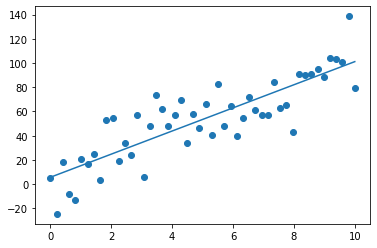

r= 0.8473435262093112


In [ ]:
# import matplotlib.pyplot as plt

# data = genData2D(LinFunc(10,1),20)
# func, corr = bestFitLine(data)

# plt.scatter(data[:,0],data[:,1])
# plt.plot(data[:,0],[func.subs(jj) for jj in data[:,0]])
# plt.show()

# print('r =', corr)

In [ ]:
# data = genData2D(LinFunc(1,1),2, size=15)
# func, corr = bestFitLine(data)

# print('r =', corr)

# print(residPlot(data,func))

r = 0.8413862478661296
\begin{tikzpicture}\begin{axis}[mmt axis style,xmin=-10,xmax=15.0,xtick={-10,-5,...,20.0},ymin=-10,ymax=10,ytick={-10,-5,...,15},]\addplot[red,thick] coordinates {(0.0, -0.272510197318135) (0.0,0)};\addplot[red,thick] coordinates {(0.7142857142857143, 2.63759872885974) (0.7142857142857143,0)};\addplot[red,thick] coordinates {(1.4285714285714286, 0.568232895615185) (1.4285714285714286,0)};\addplot[red,thick] coordinates {(2.142857142857143, -3.03088007127496) (2.142857142857143,0)};\addplot[red,thick] coordinates {(2.857142857142857, -1.85487377633880) (2.857142857142857,0)};\addplot[red,thick] coordinates {(3.5714285714285716, 1.13058357443302) (3.5714285714285716,0)};\addplot[red,thick] coordinates {(4.285714285714286, -0.127896312009375) (4.285714285714286,0)};\addplot[red,thick] coordinates {(5.0, 3.13206982987394) (5.0,0)};\addplot[red,thick] coordinates {(5.714285714285714, -0.691150106327359) (5.714285714285714,0)};\addplot[red,thick] coordinates {(6.428571

# Inequality

In [ ]:
from sympy import *
import random
from typing import List


def _pivot(M, i, j):
    p = M[i, j]
    MM = Matrix.zeros(M.rows, M.cols)
    for ii in range(M.rows):
        for jj in range(M.cols):
            if ii == i and jj == j:
                MM[ii, jj] = 1 / M[i, j]
            elif ii == i and jj != j:
                MM[ii, jj] = M[ii, jj] / M[i, j]
            elif ii != i and jj == j:
                MM[ii, jj] = -M[ii, jj] / M[i, j]
            else:
                MM[ii, jj] = M[ii, jj] - M[ii, j] * M[i, jj] / M[i, j]
    return MM


def _simplex(M, R, S):
    """
    Simplex method with randomized pivoting
    http://web.tecnico.ulisboa.pt/mcasquilho/acad/or/ftp/FergusonUCLA_LP.pdf
    """
    while True:
        B = M[:-1, -1]
        A = M[:-1, :-1]
        C = M[-1, :-1]
        if all(B[i] >= 0 for i in range(B.rows)):
            piv_cols = []
            for j in range(C.cols):
                if C[j] < 0:
                    piv_cols.append(j)

            if not piv_cols:
                return M, R, S
            random.shuffle(piv_cols)
            j0 = piv_cols[0]

            piv_rows = []
            for i in range(A.rows):
                if A[i, j0] > 0:
                    ratio = B[i] / A[i, j0]
                    piv_rows.append((ratio, i))

            if not piv_rows:
                assert False, 'Unbounded'
            piv_rows = sorted(piv_rows, key=lambda x: (x[0], x[1]))
            piv_rows = [(ratio, i) for ratio, i in piv_rows if ratio == piv_rows[0][0]]
            random.shuffle(piv_rows)
            _, i0 = piv_rows[0]

            M = _pivot(M, i0, j0)
            R[j0], S[i0] = S[i0], R[j0]
        else:
            for k in range(B.rows):
                if B[k] < 0:
                    break

            piv_cols = []
            for j in range(A.cols):
                if A[k, j] < 0:
                    piv_cols.append(j)
            if not piv_cols:
                assert False, 'Infeasible'
            random.shuffle(piv_cols)
            j0 = piv_cols[0]

            ratio = B[k] / A[k, j0]
            piv_rows = [(ratio, k)]
            for i in range(A.rows):
                if A[i, j0] > 0 and B[i] > 0:
                    ratio = B[i] / A[i, j0]
                    piv_rows.append((ratio, i))

            piv_rows = sorted(piv_rows, key=lambda x: (x[0], x[1]))
            piv_rows = [(ratio, i) for ratio, i in piv_rows if ratio == piv_rows[0][0]]
            random.shuffle(piv_rows)
            _, i0 = piv_rows[0]

            M = _pivot(M, i0, j0)
            R[j0], S[i0] = S[i0], R[j0]

def linear_programming(A, B, C, D):
    """
    When x is a column vector of variables, y is a column vector of dual variables,
    and when the objective is either:
    *) Maximizing Cx constrained to Ax <= B and x >= 0.
    *) Minimizing y^{T}B constrained to y^{T}A >= C^{T} and y >= 0.
    Thw method s eturns a triplet of solutions optimum, argmax, argmax_dual where
    optimum is the optimum solution, argmax is x and argmax_dual is y.
    Examples
    ========
    >>> A = Matrix([[0, 1, 2], [-1, 0, -3], [2, 1, 7]])
    >>> B = Matrix([3, -2, 5])
    >>> C = Matrix([[1, 1, 5]])
    >>> D = Matrix([0])
    >>> linear_programming(A, B, C, D)
    (11/3, [0, 1/3, 2/3], [0, 2/3, 1])
    >>> A = Matrix([[2, 1, 3], [-1, -2, 3], [1, 1, 5]])
    >>> linear_programming(A, B, C, D)
    (35/9, [0, 5/3, 4/9], [13/9, 2/9, 0])
    """

    M = Matrix([[A, B], [-C, D]])
    r_orig = ['x_{}'.format(j) for j in range(M.cols - 1)]
    s_orig = ['y_{}'.format(i) for i in range(M.rows - 1)]

    r = r_orig.copy()
    s = s_orig.copy()

    M, r, s = _simplex(M, r, s)

    argmax = []
    argmin_dual = []

    for x in r_orig:
        for i, xx in enumerate(s):
            if x == xx:
                argmax.append(M[i, -1])
                break
        else:
            argmax.append(S.Zero)

    for x in s_orig:
        for i, xx in enumerate(r):
            if x == xx:
                argmin_dual.append(M[-1, i])
                break
        else:
            argmin_dual.append(S.Zero)

    return M[-1, -1], argmax, argmin_dual


# A = Matrix([[0, 1, 2], [-1, 0, -3], [2, 1, 7]])
# B = Matrix([3, -2, 5])
# C = Matrix([[1, 1, 5]])
# D = Matrix([0])

# (11/3, [0, 1/3, 2/3], [0, 2/3, 1])
# a,b,c = linear_programming(A, B, C, D)
# print(a)
# print(b)
# print(c)

x,y,z = symbols("x y z")


def rearrange_ineq(ineq : Rel):
    """
    Parameters:
    inequality to rearrange.
    Returns
    rearranged inequality so that the symbols are on the left side
    and the constants are on the right side.
    >>> e = 2 - x  >= y + 4
    >>> rearrange_ineq(e)
    x + y <= -2
    >>> e = (1/2)*x - sqrt(2) - 4 <= 0
    >>> rearrange_ineq(e)
    0.5*x <= sqrt(2) + 4
    >>> e = 3*x + 2*y - 8 - sqrt(2) >= x + 4
    >>> rearrange_ineq(e)
    -2*x - 2*y <= -12 - sqrt(2)
    """
    nl = ineq.lhs - ineq.rhs
    cons = 0
    op = ineq.rel_op
    if op != ">=" and op != "<=":
        assert False, 'Error: expected <= or >= realtion, got ' + str(op)
    if len(nl.free_symbols) == 1 and isinstance(nl, Mul) and op == "<=":
        return Le(nl, 0)
    if len(nl.free_symbols) == 1 and isinstance(nl, Mul) and op == ">=":
        return Le(-1*nl, 0)
    for v in nl.args:
        if len(v.free_symbols) >= 1:
            continue
        else:
            cons += v
    if op == ">=":
        return Le(-1*(nl-cons), cons)
    elif op == "<=":
        return Le(nl - cons, -1*cons)


def get_coef(expr: Expr):
    temp_dic = {}
    for s in expr.free_symbols:
        temp_dic[s] = 0
    if len(expr.free_symbols) == 1 and isinstance(expr, Symbol):
        temp_dic[expr] = 1
        return temp_dic
    if len(expr.free_symbols) == 1 and isinstance(expr, Mul):
        smb = None
        mul = 1
        for v in expr.args:
            if isinstance(v, Symbol):
                smb = v
            else:
                mul *= nsimplify(v)
        temp_dic[smb] = mul
        return temp_dic
    for v in expr.args:
        if isinstance(v, Symbol):
            temp_dic[v] = temp_dic.get(v, 0) + 1
        if isinstance(v, Mul):
            smb = None
            mul = 1
            for val in v.args:
                if isinstance(val, Symbol):
                    smb = val
                else:
                    mul *= nsimplify(val)
            temp_dic[smb] += mul
    return temp_dic

# Maximize and Minimize Cx + D (expr) constrained with Ax <= B and x >= 0 (iset), returning [min, max] interval
def find_valus_interval(iset: List[Rel], expr: Expr):
    """
    Parameters
    ----------
    iset - linear inequalities set of constraints
    expr - target expression
    Returns the the possible values of expr as an interval of [min, max].
    -------
    >>> eq1 = x <= 2
    >>> eq2 = y <= 1
    >>> find_valus_interval([eq1, eq2], x)
    [0, 2]
    >>> find_valus_interval([eq1, eq2], y)
    [0, 1]
    >>> find_valus_interval([eq1, eq2], y + 2*x)
    [0, 5]
    >>> eq1 = z >= 2
    >>> eq2 = z <= sqrt(5)
    >>> eq3 = x + z <= 3
    >>> find_valus_interval([eq1, eq2, eq3], z)
    [2, sqrt(5)]
    >>> find_valus_interval([eq1, eq2, eq3], x)
    [0, 1]
    >>> find_valus_interval([eq1, eq2, eq3], 2*x + z) # we want more value to x and less to z, so z = 2 and x = 1.
    [2, 4]
    >>> find_valus_interval([eq1, eq2, eq3], x + 2*z) # we want more value to z and less to x, so z = sqrt(5) and x = 3 - sqrt(5)
    [4, sqrt(5) + 3]
    >>> eq1 = sqrt(3)*z >= 2
    >>> eq2 = 1.0*z <= sqrt(5)
    >>> eq3 = 1/2*x + 0.5*x + z <= 3
    >>> find_valus_interval([eq1, eq2, eq3], z )
    [2*sqrt(3)/3, sqrt(5)]
    >>> find_valus_interval([eq1, eq2, eq3], x)
    [0, 3 - 2*sqrt(3)/3]
    >>> find_valus_interval([eq1, eq2, eq3], z - x)
    [-3 + 4*sqrt(3)/3, sqrt(5)]
    >>> eq1 = x + y <= 2
    >>> eq2 = 2*x - y <= 6
    >>> eq3 = -y >= -sqrt(2)
    >>> find_valus_interval([eq1, eq2, eq3], y)
    [0, sqrt(2)]
    >>> find_valus_interval([eq1, eq2, eq3], x)
    [0, 2]
    >>> find_valus_interval([eq1, eq2, eq3], x + 2*y)
    [0, sqrt(2) + 2]
    >>> eq1 = x <= 6
    >>> find_valus_interval([eq1], x)
    [0, 6]
    >>> eq1 = x + y <= 3
    >>> eq2 = x + y >= 2
    >>> find_valus_interval([eq1, eq2], x + y)
    [2, 3]
    >>> find_valus_interval([eq1, eq2], -x - y)
    [-3, -2]
    """
    _symbols = set()
    for r in iset:
        _symbols = _symbols.union(r.free_symbols)
    al = []
    bl = []
    cl = []
    dl = []
    for r in iset:
        r = rearrange_ineq(r)
        # print("rearenged: ", r)
        tl = []
        temp_dic = get_coef(r.lhs)
        # print(temp_dic)
        for s in _symbols:
            tl.append(temp_dic.get(s, 0))
        al.append(tl)
        bl.append(r.rhs)
    # print("al: ", al)
    # print("bl: ", bl)
    temp_dic = get_coef(expr)
    for s in temp_dic:
        if s not in _symbols:
            assert False, 'Error: there is no data about Symbol ' + str(s)
    for s in _symbols:
        cl.append(temp_dic.get(s, 0))
    # print("cl: ", cl)
    if len(expr.free_symbols) == 1 and (isinstance(expr, Mul) or isinstance(expr, Symbol)):
        dl.append(0)
    else:
        dl.append(0)
        cons = 0
        for v in expr.args:
            if len(v.free_symbols) >= 1:
                continue
            else:
                cons += v
        dl[0] = cons
    # print("dl: ", dl)
    A = Matrix(al)
    B = Matrix(bl)
    C = Matrix([cl])
    D = Matrix(dl)
    max,b,c = linear_programming(A, B, C, D)
    min, b,c = linear_programming(A, B, C*-1, D*-1)
    return [-1*min, max]
    # print(a)
    # print(b)
    # print(c)

def is_implied_by(iset: List[Rel], target: Rel):
    """
    :param iset: linear inequalities set
    :param target: target linear inequality
    :return: true if the traget is implied by iset or false
    if it is not.
    >>> eq1 = 2*x + y <= 20
    >>> eq2 = -4*x + 5*y <= 10
    >>> eq3 = -x + 2*y >= -2
    >>> eq4 = x >= 0
    >>> eq5 = y >= 0
    >>> is_implied_by([eq1, eq2, eq3, eq4, eq5], x + 2*y >= 10)  # the optional values of x+2y are between [0, 145/7]
    False
    >>> is_implied_by([eq1, eq2, eq3, eq4, eq5], x + 2*y >= -0.00001)
    True
    >>> is_implied_by([eq1, eq2, eq3, eq4, eq5], x + y >= 0.00001 - y)
    False
    >>> is_implied_by([eq1, eq2, eq3, eq4, eq5], x + 2*y <= 145/7 + 0.0001)
    True
    >>> is_implied_by([eq1, eq2, eq3, eq4, eq5], x + 2*y <= 145/7 - 0.0001)
    False
    >>> eq1 = z >= 2
    >>> eq2 = z <= sqrt(5)
    >>> eq3 = x + z <= 3
    >>> is_implied_by([eq1, eq2, eq3], 2*x + z >= 1.9999) # the optinal values of 2*x + z are between [2, 4]
    True
    >>> is_implied_by([eq1, eq2, eq3], 2*x + z >= 2.00001)
    False
    >>> is_implied_by([eq1, eq2, eq3], 2*x + z <= 4.00001)
    True
    >>> is_implied_by([eq1, eq2, eq3], 2*x + z <= 3.9999)
    False
    """
    target = rearrange_ineq(target)
    min, max = find_valus_interval(iset, target.lhs)
    rel = target.rel_op
    if rel == ">=" and min >= target.rhs:
        return True
    if rel == ">=" and min < target.rhs:
        return False
    if rel == "<=" and max <= target.rhs:
        return True
    if rel == "<=" and max >= target.rhs:
        return False
    return None


def simplify_linear_inequalites(iset: List[Rel]):
    """
    :param iset: linear inequalities set to be simplified ( redaundent inequalities
    would be removed).
    :return: simplified set of inequalities.
    >>> eq1 = x + y >= 10
    >>> eq2 = x + y >= 20
    >>> eq3 = x + y <= 30
    >>> simplify_linear_inequalites([eq1, eq2, eq3])
    [x + y >= 20, x + y <= 30]
    >>> eq4 = x + y >= 5
    >>> eq5 = x + y <= 40
    >>> simplify_linear_inequalites([eq1, eq2, eq3, eq4, eq5])
    [x + y >= 20, x + y <= 30]
    >>> eq1 = x + y >= 10
    >>> eq2 = x - y >= 20
    >>> eq2 = 2*x >= 30
    >>> eq4 = x + y <= 30
    >>> simplify_linear_inequalites([eq1, eq2, eq3, eq4])
    [2*x >= 30, x + y <= 30]
    """
    # reduced = []
    # for target in iset:
    #     temp = []
    #     for ineq in iset:
    #         if ineq is not target:
    #             temp.append(ineq)
    #     try:
    #         if not is_implied_by(temp, target):
    #             reduced.append(target)
    #     except:
    #         reduced.append(target)
    reduced = []
    tiset = iset
    while len(tiset) != 0:
        target = tiset[0]
        temp = reduced + tiset[1:]
        try:
            if not is_implied_by(temp, target):
                reduced.append(target)
        except:
            reduced.append(target)
        tiset = tiset[1:]
    return reduced




# eq1 = 2*x + y <= 20
# eq2 = 4*x + 5*y <= 10
# eq3 = -x + 2*y >= -2
# print(type(eq1))

# ans = find_valus_interval([eq1, eq2, eq3], x + 2*y)
# print(ans)

# e = 3*x + 2*y - 8 - sqrt(2) >= x + 4
# e = rearrange_ineq(e)
# print(e)

# eq1 = x  >= 2
# eq2 = x <= 5
# ans = find_valus_interval([eq1, eq2], -x)
# print("ans: ", ans)